<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

# Decision Trees on titanic dataset

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Preprocessing](#section3)
4. [Decision Tree](#section4)<br>
    - 4.1 [Introduction of Decision Tree](#section401)<br>
    - 4.2 [Important Terminology related to Decision Trees](#section402)<br>
    - 4.3 [Types of Decision Trees](#section403)<br>
    - 4.4 [Concept of Homogenity](#section404)<br>
    - 4.5 [How does a tree decide where to split?](#section405)<br>
         - 4.5.1 [Gini Index](#GiniIndex)<br>
         - 4.5.2 [Information Gain](#InformationGain)<br>
    - 4.6 [Advantages of using Decision Tree](#section406)<br>
    - 4.7 [Shortcomings of Decision Trees](#section407)<br>
    - 4.8 [Preparing X and y using pandas](#section408)<br>
    - 4.9 [Splitting X and y into training and test datasets.](#section409)<br>
    - 4.10 [Decision Tree in scikit-learn](#section410)<br>
    - 4.11 [Using the Model for Prediction](#section411)<br>
5. [Model evaluation](#section5)<br>
    - 5.1 [Model Evaluation using accuracy score](#section501)<br>
    - 5.2 [Model Evaluation using confusion matrix](#section502)<br>
6. [Decision Tree with Gridsearch](#section6)<br>

<a id=section1></a>

### 1. Problem Statement

The goal is to __predict survival__ of passengers travelling in RMS __Titanic__ using __Logistic regression__.

<a id=section2></a>

### 2. Data Loading and Description
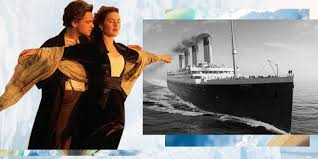

<a id=section201></a>

- The dataset consists of the information about people boarding the famous RMS Titanic. Various variables present in the dataset includes data of age, sex, fare, ticket etc. 
- The dataset comprises of __891 observations of 12 columns__. Below is a table showing names of all the columns and their description.

| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| PassengerId   | Passenger Identity                                        | 
| Survived      | Whether passenger survived or not                         |  
| Pclass        | Class of ticket                                           | 
| Name          | Name of passenger                                         |   
| Sex           | Sex of passenger                                          |
| Age           | Age of passenger                                          |
| SibSp         | Number of sibling and/or spouse travelling with passenger |
| Parch         | Number of parent and/or children travelling with passenger|
| Ticket        | Ticket number                                             |
| Fare          | Price of ticket                                           |
| Cabin         | Cabin number                                              |
| Embarked      | Gate of embarmkment                                       |

#### Importing packages                                          

In [1]:
import sys
!{sys.executable} -m pip install pandas-profiling

  Using cached pandas-0.25.3-cp37-cp37m-macosx_10_9_x86_64.whl (10.2 MB)
  Using cached Jinja2-2.11.1-py2.py3-none-any.whl (126 kB)
  Using cached tqdm-4.42.0-py2.py3-none-any.whl (59 kB)
  Using cached requests-2.22.0-py2.py3-none-any.whl (57 kB)
     |████████████████████████████████| 118 kB 351 kB/s eta 0:00:01
     |████████████████████████████████| 58 kB 589 kB/s eta 0:00:01


ERROR: jupyterlab 1.2.6 has requirement jupyterlab_server~=1.0.0, but you'll have jupyterlab-server 1.1.4 which is incompatible.
  Attempting uninstall: pandas
    Found existing installation: pandas 1.0.3
    Uninstalling pandas-1.0.3:
ERROR: Could not install packages due to an EnvironmentError: [Errno 13] Permission denied: 'RECORD'
Consider using the `--user` option or check the permissions.



In [1]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity= 'all'



Bad key "text.kerning_factor" on line 4 in
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


#### Importing the Dataset

In [2]:
#titanic_data = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Casestudy/titanic_train.csv")     # Importing training dataset using pd.read_csv
#titanic_data = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Casestudy/titanic_train.csv")     # Importing training dataset using pd.read_csv
#path = os.path.join('c:' + os.sep, 'Users', 'xxxx', 'Desktop', 'student-intervention-system', 'student-data.csv')
events_data = pd.read_csv(r"/Users/kapil.gupta/Downloads/events_data.csv", dtype={'device_id':str})


In [3]:
events_data.head()

event_id             device_id            timestamp  longitude   latitude  \
0   2765368   2973347786994914304  2016-05-07 22:52:05  77.225676  28.730140   
1   2955066   4734221357723754978  2016-05-01 20:44:16  88.388361  22.660325   
2    605968  -3264499652692492784  2016-05-02 14:23:04  77.256809  28.757906   
3    448114   5731369272434022440  2016-05-03 13:21:16  80.343613  13.153332   
4    665740    338888002570799963  2016-05-06 03:51:05  85.997745  23.842609   

       city       state  
0     Delhi       Delhi  
1  Calcutta  WestBengal  
2     Delhi       Delhi  
3   Chennai   TamilNadu  
4    Bokaro   Jharkhand

In [3]:
events_data.isnull().sum()

event_id       0
device_id    453
timestamp      0
longitude    423
latitude     423
city           0
state        377
dtype: int64

Observation 
City have 0 Null values but state have 377

In [3]:
#filter Null data 
#null_data1 = events_data[events_data.isnull().any(axis=1)]
#getting state null data
null_data1 = events_data[events_data['state'].isnull()]

In [4]:
null_data1.isnull().sum()
null_data1.info() #before

event_id       0
device_id      0
timestamp      0
longitude      0
latitude       0
city           0
state        377
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377 entries, 2931 to 3242228
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   event_id   377 non-null    int64  
 1   device_id  377 non-null    object 
 2   timestamp  377 non-null    object 
 3   longitude  377 non-null    float64
 4   latitude   377 non-null    float64
 5   city       377 non-null    object 
 6   state      0 non-null      object 
dtypes: float64(2), int64(1), object(4)
memory usage: 23.6+ KB


In [5]:
notnull_data1 = events_data[events_data['state'].notnull()]

In [6]:
notnull_data1.isnull().sum()

event_id       0
device_id    453
timestamp      0
longitude    423
latitude     423
city           0
state          0
dtype: int64

In [7]:
#notnull_data1['city'].unique()
citylist=list(notnull_data1['city'])

In [8]:
print(citylist[0:10])

['Delhi', 'Calcutta', 'Delhi', 'Chennai', 'Bokaro', 'Visakhapatnam', 'Chennai', 'Wanparti', 'Delhi', 'Mumbai']


In [9]:
statelist=list(notnull_data1['state'])

In [10]:
print(statelist[0:10])

['Delhi', 'WestBengal', 'Delhi', 'TamilNadu', 'Jharkhand', 'AndhraPradesh', 'TamilNadu', 'AndhraPradesh', 'Delhi', 'Maharashtra']


In [11]:
city_state_dict={citylist[i]: statelist[i] for i in range(len(citylist))} 

In [12]:
city_state_dict['Delhi']

'Delhi'

In [13]:
#isin method for making filter on data or we can use query method as well

#events_data=events_data[events_data["state"].isin(["WestBengal","Kerala","Delhi"])]
#events_data.head()

In [14]:
#notnull_data1.isnull().sum()
import itertools
#for (a, b, c) in zip(num, color, value): 
for (i,j) in zip(null_data1['city'], null_data1['state']):
    for key, value in city_state_dict.items():
        if i==key:
            null_data1['state']=value
                      
        

             
                
         

    
                     
                     
                    

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [15]:
null_data1.isnull().sum()
null_data1.info() #after doing Missing value treatment for state column

event_id     0
device_id    0
timestamp    0
longitude    0
latitude     0
city         0
state        0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377 entries, 2931 to 3242228
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   event_id   377 non-null    int64  
 1   device_id  377 non-null    object 
 2   timestamp  377 non-null    object 
 3   longitude  377 non-null    float64
 4   latitude   377 non-null    float64
 5   city       377 non-null    object 
 6   state      377 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 23.6+ KB


In [16]:
notnull_data1.shape
null_data1.shape

(3252573, 7)

(377, 7)

In [17]:
#concatibation of two dataframe 
#result = df1.append(df2)
eventdata=notnull_data1.append(null_data1)

In [29]:
eventdata.head()
eventdata.shape
eventdata.info()
eventdata.isnull().sum()
print("\n below values for original or old event data events_data \n")
events_data.shape
events_data.info()
events_data.isnull().sum()

event_id             device_id            timestamp  longitude   latitude  \
1    2955066   4734221357723754978  2016-05-01 20:44:16  88.388361  22.660325   
28    769546  -1817502319478569661  2016-05-01 14:07:23  88.371813  22.662852   
30   1750603  -5598137337131306950  2016-05-05 15:47:03  70.212684  23.118370   
31   3085968  -3808296883972395680  2016-05-07 01:25:47  75.513019  11.812367   
39   1407594  -2995507760806350372  2016-05-03 20:01:35  77.805194  13.533295   

            city       state  
1       Calcutta  WestBengal  
28      Calcutta  WestBengal  
30    Gandhidham     Gujarat  
31    Thalassery      Kerala  
39  ChikBallapur   Karnataka

(422915, 7)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422915 entries, 1 to 3252921
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   event_id   422915 non-null  int64  
 1   device_id  422867 non-null  object 
 2   timestamp  422915 non-null  object 
 3   longitude  422873 non-null  float64
 4   latitude   422873 non-null  float64
 5   city       422915 non-null  object 
 6   state      422915 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 25.8+ MB


event_id      0
device_id    48
timestamp     0
longitude    42
latitude     42
city          0
state         0
dtype: int64


 below values for original or old event data events_data 



(3252950, 7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   event_id   int64  
 1   device_id  object 
 2   timestamp  object 
 3   longitude  float64
 4   latitude   float64
 5   city       object 
 6   state      object 
dtypes: float64(2), int64(1), object(4)
memory usage: 173.7+ MB


event_id       0
device_id    453
timestamp      0
longitude    423
latitude     423
city           0
state        377
dtype: int64

In [30]:
eventdata.isnull().sum()

event_id      0
device_id    48
timestamp     0
longitude    42
latitude     42
city          0
state         0
dtype: int64

In [31]:
eventdata=eventdata[eventdata["state"].isin(["Gujarat","Karnataka","WestBengal","Bihar","Punjab", "Kerala"])]
#dfnew=df_left2.query('state == ["Gujarat","Karnataka","WestBengal","Bihar","Punjab", "Kerala"]')
#eventdata.device_id = eventdata.device_id.astype(str)


In [32]:
eventdata.isnull().sum()
eventdata.shape

event_id      0
device_id    48
timestamp     0
longitude    42
latitude     42
city          0
state         0
dtype: int64

(422915, 7)

In [33]:
#null_data2 = eventdata[eventdata.isnull()]


In [34]:
null_data2 = eventdata[eventdata['longitude'].isnull()]
notnull_data2 = eventdata[eventdata['longitude'].notnull()]
null_data2_new=null_data2
null_data2.shape
notnull_data2.shape

(42, 7)

(422873, 7)

In [35]:
!pip install geopy

In [36]:
"""import numpy as np
import sys
original_stdout = sys.stdout
f = open('myfile', 'w')
#https://stackoverflow.com/questions/37248677/how-to-fill-missing-geo-location-in-datasets
#https://www.drupal.org/project/getlocations/issues/1659540

from geopy.geocoders import Nominatim
    #newlocation= (location, ':', geoloc.latitude, ':' ,geoloc.longitude)
#geolocator = Nominatim(user= x for j in null_data2['city'] )
for location in null_data2['city']:
    #print(location)
    geolocator = Nominatim(user_agent=location) 
    geoloc = geolocator.geocode(location)
    #print(geoloc)
    sys.stdout = f
    print(location , geoloc.latitude, geoloc.longitude)
    sys.stdout = original_stdout
f.close()"""
    #for j in geoloc:
     #   null_data2['longitude']=geoloc.latitude
     #   null_data2['latitude']=geoloc.longitude""""""

"import numpy as np\nimport sys\noriginal_stdout = sys.stdout\nf = open('myfile', 'w')\n#https://stackoverflow.com/questions/37248677/how-to-fill-missing-geo-location-in-datasets\n#https://www.drupal.org/project/getlocations/issues/1659540\n\nfrom geopy.geocoders import Nominatim\n    #newlocation= (location, ':', geoloc.latitude, ':' ,geoloc.longitude)\n#geolocator = Nominatim(user= x for j in null_data2['city'] )\nfor location in null_data2['city']:\n    #print(location)\n    geolocator = Nominatim(user_agent=location) \n    geoloc = geolocator.geocode(location)\n    #print(geoloc)\n    sys.stdout = f\n    print(location , geoloc.latitude, geoloc.longitude)\n    sys.stdout = original_stdout\nf.close()"

In [40]:
#To get the exect values of Latitude and logitude 
from geopy.geocoders import Nominatim
for location in null_data2['city']:
    #print(location)
    geolocator = Nominatim(user_agent=location)
    break
#geolocator = Nominatim(user_agent=location) 
locs = [ geolocator.geocode(addr) for addr in null_data2.city ]
geo_info = pd.DataFrame(
    [ (addr.address, addr.latitude, addr.longitude) for addr in locs ],
    columns=['city', 'latitude', 'longitude'])
    

In [41]:

geo_info["city"]= geo_info["city"].str.split(",", n = 1, expand = True) 
geo_info1=geo_info
#x=geo_info.city.unique()
#y=geo_info.latitude.unique()
#z=geo_info.longitude.unique()
#pd.concat([df1, df2], axis=0) 
#pd.concat([geo_info,null_data2], axis=1)


In [42]:
#reset index, this help copy data/assign data/column values from one dataframe to another data frame
geo_info1.head()
geo_info.shape

geo_info1.index = null_data2_new.index
#data.drop_duplicates(subset ="First Name", keep = False, inplace = True)
#geo_info1.drop_duplicates(subset ="city", keep = False, inplace = True)
#geo_info1.head()

city   latitude  longitude
0  Araria  26.264988  87.371626
1  Araria  26.264988  87.371626
2    Moga  30.783987  75.160574
3    Moga  30.783987  75.160574
4    Moga  30.783987  75.160574

(42, 3)

In [ ]:
null_data2_new[['latitude','longitude']] = geo_info1[['latitude', 'longitude']]

In [43]:
null_data2_new.head()

event_id            device_id            timestamp  longitude  \
120421   2828327  1320050977019711143  2016-05-02 12:37:17        NaN   
263034   1579192  1320050977019711143  2016-05-02 12:41:16        NaN   
465996   1967646  6774071338248978547  2016-05-07 12:19:31        NaN   
671477    867239  6774071338248978547  2016-05-02 19:46:58        NaN   
716006   2138951  6774071338248978547  2016-05-06 00:36:13        NaN   

        latitude    city   state  
120421       NaN  Araria   Bihar  
263034       NaN  Araria   Bihar  
465996       NaN    Moga  Punjab  
671477       NaN    Moga  Punjab  
716006       NaN    Moga  Punjab

In [44]:
#result = df1.append(df2)
#eventdata=notnull_data1.append(null_data1)

eventdata3= notnull_data2.append(null_data2_new)
eventdata3.isnull().sum() #New event data

event_id      0
device_id    48
timestamp     0
longitude    42
latitude     42
city          0
state         0
dtype: int64

In [45]:
#old data eventdata
eventdata.shape
eventdata.isnull().sum()

(422915, 7)

event_id      0
device_id    48
timestamp     0
longitude    42
latitude     42
city          0
state         0
dtype: int64

In [46]:
eventdata3.head()
eventdata3.shape

event_id             device_id            timestamp  longitude   latitude  \
1    2955066   4734221357723754978  2016-05-01 20:44:16  88.388361  22.660325   
28    769546  -1817502319478569661  2016-05-01 14:07:23  88.371813  22.662852   
30   1750603  -5598137337131306950  2016-05-05 15:47:03  70.212684  23.118370   
31   3085968  -3808296883972395680  2016-05-07 01:25:47  75.513019  11.812367   
39   1407594  -2995507760806350372  2016-05-03 20:01:35  77.805194  13.533295   

            city       state  
1       Calcutta  WestBengal  
28      Calcutta  WestBengal  
30    Gandhidham     Gujarat  
31    Thalassery      Kerala  
39  ChikBallapur   Karnataka

(422915, 7)

In [47]:
eventdata3new=eventdata3

In [48]:
#need to remove missing values for Device_id
devicedatanull=eventdata3new[eventdata3new.device_id.isnull()]
eventdata3notnull=eventdata3new[eventdata3new.device_id.notnull()]
eventdata3notnull.shape
devicedatanull.shape


(422867, 7)

(48, 7)

In [49]:
devicedatanull.shape
devicedatanull.city.unique()


(48, 7)

array(['Hoshiarpur', 'Bardoli', 'Jetpur'], dtype=object)

In [50]:
devicedatanull.device_id = eventdata3new.groupby('city').device_id.transform(lambda x: x.mode()[0])

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [51]:
devicedatanull.head()

event_id             device_id            timestamp  longitude  \
44823    3227383   1750778632182066836  2016-05-05 08:37:09  75.992551   
238324   1787536   1750778632182066836  2016-05-04 22:19:21  75.992551   
406144    118826  -8215770519233685145  2016-05-06 22:05:48  73.169345   
452040   2676255  -1688015122502424125  2016-05-02 20:37:30  70.686387   
463501    893484  -8215770519233685145  2016-05-04 06:44:34  73.169345   

         latitude        city    state  
44823   31.561747  Hoshiarpur   Punjab  
238324  31.561747  Hoshiarpur   Punjab  
406144  21.194283     Bardoli  Gujarat  
452040  21.790693      Jetpur  Gujarat  
463501  21.194283     Bardoli  Gujarat

In [52]:
#result = df1.append(df2)
eventdata_final=eventdata3notnull.append(devicedatanull)

In [53]:
eventdata_final.isnull().sum()
eventdata_final.shape

event_id      0
device_id     0
timestamp     0
longitude    42
latitude     42
city          0
state         0
dtype: int64

(422915, 7)

In [54]:
#Notes:
# replacing null value in state column
#events_data.state = events_data.groupby('city').state.transform('first')
# replacing null value in lat long columns
#events_data.longitude = events_data.groupby('city').longitude.transform('first')
#events_data.latitude = events_data.groupby('city').latitude.transform('first')
#mean_filled_df = missing_df.fillna(missing_df.mean())

In [55]:
#pip install mysql-connector-python

In [56]:
import mysql.connector

cnx = mysql.connector.connect(user='student', password='student',
                              host='cpanel.insaid.co',
                              database='Capstone1')
cnx.close()

In [57]:
print(cnx)

In [58]:
import mysql.connector as sql
import pandas as pd

db_connection = sql.connect(host='cpanel.insaid.co', database='Capstone1', user='student', password='student')

db_cursor = db_connection.cursor()
db_cursor.execute("SHOW TABLES")
databases = db_cursor.fetchall()
print(databases)
for database in databases:
    print(database)

[('events_data',), ('gender_age_train',), ('phone_brand_device_model',)]
('events_data',)
('gender_age_train',)
('phone_brand_device_model',)


In [61]:
import mysql.connector as sql
import pandas as pd

db_connection = sql.connect(host='cpanel.insaid.co', database='Capstone1', user='student', password='student')

db_cursor = db_connection.cursor()
db_cursor.execute('SELECT * FROM gender_age_train' )

table_rows = db_cursor.fetchall()
db_cursor.close()
db_connection.close()
df_gender_age = pd.DataFrame(table_rows)
df_gender_age.to_csv("gender_age_train.csv", index=False)
df_gender_age.head()

True

0  1   2       3
0 -8076087639492063270  M  35  M32-38
1 -2897161552818060146  M  35  M32-38
2 -8260683887967679142  M  35  M32-38
3 -4938849341048082022  M  30  M29-31
4   245133531816851882  M  30  M29-31

In [62]:
#rename cloumn gapminder.rename(columns={'lifeExp':'life_exp'}
df_gender_age.rename(columns={0:'device_id',1:'gender', 2:'age', 3:'Gen_age_range'}, inplace=True)

In [63]:
df_gender_age.info()
df_gender_age.device_id = df_gender_age.device_id.astype(str)
df_gender_age.info()
df_gender_age.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   device_id      74645 non-null  int64 
 1   gender         74645 non-null  object
 2   age            74645 non-null  int64 
 3   Gen_age_range  74645 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   device_id      74645 non-null  object
 1   gender         74645 non-null  object
 2   age            74645 non-null  int64 
 3   Gen_age_range  74645 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


device_id gender  age Gen_age_range
0  -8076087639492063270      M   35        M32-38
1  -2897161552818060146      M   35        M32-38
2  -8260683887967679142      M   35        M32-38
3  -4938849341048082022      M   30        M29-31
4    245133531816851882      M   30        M29-31

In [64]:
df_gender_age.isnull().sum()

device_id        0
gender           0
age              0
Gen_age_range    0
dtype: int64

In [68]:
db_connection = sql.connect(host='cpanel.insaid.co', database='Capstone1', user='student', password='student')

db_cursor = db_connection.cursor()
db_cursor.execute('SELECT * FROM phone_brand_device_model' )

table_rows = db_cursor.fetchall()
db_cursor.close()
db_connection.close()
df_phone_brand_device_model = pd.DataFrame(table_rows)
df_phone_brand_device_model.to_csv("phone_brand_device_model.csv", index=False)
df_phone_brand_device_model.head()

True

0     1        2
0  1877775838486905855  vivo      Y13
1 -3766087376657242966    小米     V183
2 -6238937574958215831  OPPO      R7s
3  8973197758510677470    三星    A368t
4 -2015528097870762664    小米  红米Note2

In [69]:
df_phone_brand_device_model.rename(columns={0:'device_id',1:'brand', 2:'model'}, inplace=True)

In [70]:
df_phone_brand_device_model.device_id = df_phone_brand_device_model.device_id.astype(str)
df_phone_brand_device_model.head()


device_id brand    model
0   1877775838486905855  vivo      Y13
1  -3766087376657242966    小米     V183
2  -6238937574958215831  OPPO      R7s
3   8973197758510677470    三星    A368t
4  -2015528097870762664    小米  红米Note2

In [71]:
df_phone_brand_device_model.isnull().sum()

device_id    0
brand        0
model        0
dtype: int64

In [72]:
eventdata_final.info()
df_gender_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422915 entries, 1 to 3230115
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   event_id   422915 non-null  int64  
 1   device_id  422915 non-null  object 
 2   timestamp  422915 non-null  object 
 3   longitude  422873 non-null  float64
 4   latitude   422873 non-null  float64
 5   city       422915 non-null  object 
 6   state      422915 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 25.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   device_id      74645 non-null  object
 1   gender         74645 non-null  object
 2   age            74645 non-null  int64 
 3   Gen_age_range  74645 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [73]:
#left join

df_left1 = pd.merge(eventdata_final, df_gender_age, on='device_id', how='left')


In [74]:
df_left2= pd.merge(df_left1, df_phone_brand_device_model, on='device_id', how='left'  )

In [75]:
df_left2.head()

event_id             device_id            timestamp  longitude   latitude  \
0   2955066   4734221357723754978  2016-05-01 20:44:16  88.388361  22.660325   
1    769546  -1817502319478569661  2016-05-01 14:07:23  88.371813  22.662852   
2   1750603  -5598137337131306950  2016-05-05 15:47:03  70.212684  23.118370   
3   3085968  -3808296883972395680  2016-05-07 01:25:47  75.513019  11.812367   
4   1407594  -2995507760806350372  2016-05-03 20:01:35  77.805194  13.533295   

           city       state gender  age Gen_age_range brand    model  
0      Calcutta  WestBengal      M   30        M29-31  vivo      X5M  
1      Calcutta  WestBengal      F   43          F43+  OPPO    R819T  
2    Gandhidham     Gujarat      M   23        M23-26    魅族      MX3  
3    Thalassery      Kerala      M   24        M23-26  vivo      X5L  
4  ChikBallapur   Karnataka      M   29        M29-31  OPPO  R7 Plus

In [76]:
df_left2.state.unique()

array(['WestBengal', 'Gujarat', 'Kerala', 'Karnataka', 'Punjab', 'Bihar'],
      dtype=object)

In [77]:
#rows = data.loc[["Avery Bradley", "R.J. Hunter"]] 
#df.loc[(df["category"] == "Belt") & (df["quantity"] >= 10), ["commission"]] = .04
#df.head()
dfnew=df_left2.query('state == ["Gujarat","Karnataka","WestBengal","Bihar","Punjab", "Kerala"]')
#df_left2.loc[(df_left2['state']=='Gujarat') & (df_left2['state']=='WestBengal')]
dfnew.head()

event_id             device_id            timestamp  longitude   latitude  \
0   2955066   4734221357723754978  2016-05-01 20:44:16  88.388361  22.660325   
1    769546  -1817502319478569661  2016-05-01 14:07:23  88.371813  22.662852   
2   1750603  -5598137337131306950  2016-05-05 15:47:03  70.212684  23.118370   
3   3085968  -3808296883972395680  2016-05-07 01:25:47  75.513019  11.812367   
4   1407594  -2995507760806350372  2016-05-03 20:01:35  77.805194  13.533295   

           city       state gender  age Gen_age_range brand    model  
0      Calcutta  WestBengal      M   30        M29-31  vivo      X5M  
1      Calcutta  WestBengal      F   43          F43+  OPPO    R819T  
2    Gandhidham     Gujarat      M   23        M23-26    魅族      MX3  
3    Thalassery      Kerala      M   24        M23-26  vivo      X5L  
4  ChikBallapur   Karnataka      M   29        M29-31  OPPO  R7 Plus

In [78]:
dfnew.state.unique()

array(['WestBengal', 'Gujarat', 'Kerala', 'Karnataka', 'Punjab', 'Bihar'],
      dtype=object)

In [79]:
dfnew.info()
dfnew.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422915 entries, 0 to 422914
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_id       422915 non-null  int64  
 1   device_id      422915 non-null  object 
 2   timestamp      422915 non-null  object 
 3   longitude      422873 non-null  float64
 4   latitude       422873 non-null  float64
 5   city           422915 non-null  object 
 6   state          422915 non-null  object 
 7   gender         422915 non-null  object 
 8   age            422915 non-null  int64  
 9   Gen_age_range  422915 non-null  object 
 10  brand          422915 non-null  object 
 11  model          422915 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 41.9+ MB


event_id          0
device_id         0
timestamp         0
longitude        42
latitude         42
city              0
state             0
gender            0
age               0
Gen_age_range     0
brand             0
model             0
dtype: int64

In [80]:
finaldata1=dfnew.copy(deep=True)

finaldata1.shape
finaldata1.head()

(422915, 12)

event_id             device_id            timestamp  longitude   latitude  \
0   2955066   4734221357723754978  2016-05-01 20:44:16  88.388361  22.660325   
1    769546  -1817502319478569661  2016-05-01 14:07:23  88.371813  22.662852   
2   1750603  -5598137337131306950  2016-05-05 15:47:03  70.212684  23.118370   
3   3085968  -3808296883972395680  2016-05-07 01:25:47  75.513019  11.812367   
4   1407594  -2995507760806350372  2016-05-03 20:01:35  77.805194  13.533295   

           city       state gender  age Gen_age_range brand    model  
0      Calcutta  WestBengal      M   30        M29-31  vivo      X5M  
1      Calcutta  WestBengal      F   43          F43+  OPPO    R819T  
2    Gandhidham     Gujarat      M   23        M23-26    魅族      MX3  
3    Thalassery      Kerala      M   24        M23-26  vivo      X5L  
4  ChikBallapur   Karnataka      M   29        M29-31  OPPO  R7 Plus

In [81]:
finaldata1['brand'].unique()

array(['vivo', 'OPPO', '魅族', '三星', '努比亚', '小米', '华为', '酷派', '华硕', '锤子',
       '乐视', 'HTC', '海信', 'TCL', '天语', '中国移动', 'ZUK', 'LG', '联想 ', '优米',
       '一加', '语信', '美图', '朵唯', '斐讯', '奇酷', '唯米', '酷比魔方', '富可视', '摩托罗拉',
       '神舟', '昂达', '青橙', '凯利通', '乡米', 'LOGO', '梦米', '青葱', '聆韵', '维图',
       '亿通', '波导', '海尔', '至尊宝', '优购', '艾优尼', '康佳', 'Lovme', '易派', '百立丰',
       '诺基亚', '欧博信', '纽曼', '酷珀', '先锋', '邦华', '宝捷讯', '酷比', '小杨树', '糯米',
       '鲜米', '沃普丰', '台电', '黑米', '优语', '米歌', '夏新', '广信', '欧新', '惠普', '虾米',
       '贝尔丰', '谷歌', '白米', '大可乐', '爱派尔', '蓝魔', '果米', '大Q', '长虹', '欧奇',
       '西米', '尼比鲁', '糖葫芦', 'E派', '飞利浦', '诺亚信', 'PPTV', '德赛', '普耐尔', '欧比'],
      dtype=object)

In [82]:
y=list(finaldata1.brand.unique())


In [83]:
print(y)

['vivo', 'OPPO', '魅族', '三星', '努比亚', '小米', '华为', '酷派', '华硕', '锤子', '乐视', 'HTC', '海信', 'TCL', '天语', '中国移动', 'ZUK', 'LG', '联想 ', '优米', '一加', '语信', '美图', '朵唯', '斐讯', '奇酷', '唯米', '酷比魔方', '富可视', '摩托罗拉', '神舟', '昂达', '青橙', '凯利通', '乡米', 'LOGO', '梦米', '青葱', '聆韵', '维图', '亿通', '波导', '海尔', '至尊宝', '优购', '艾优尼', '康佳', 'Lovme', '易派', '百立丰', '诺基亚', '欧博信', '纽曼', '酷珀', '先锋', '邦华', '宝捷讯', '酷比', '小杨树', '糯米', '鲜米', '沃普丰', '台电', '黑米', '优语', '米歌', '夏新', '广信', '欧新', '惠普', '虾米', '贝尔丰', '谷歌', '白米', '大可乐', '爱派尔', '蓝魔', '果米', '大Q', '长虹', '欧奇', '西米', '尼比鲁', '糖葫芦', 'E派', '飞利浦', '诺亚信', 'PPTV', '德赛', '普耐尔', '欧比']


In [84]:
# Making plotly specific imports
# These imports are necessary to use plotly offline without signing in to their website.

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly import tools
init_notebook_mode(connected=True)
Topbrands=finaldata1['brand'].value_counts()[:10]

In [85]:
Topbrands

小米      108174
三星       87952
华为       75162
vivo     35382
OPPO     34228
魅族       26062
酷派       18034
HTC       5926
联想        4624
乐视        4612
Name: brand, dtype: int64

In [86]:
z=list(Topbrands.index)

In [87]:
print(y)

['vivo', 'OPPO', '魅族', '三星', '努比亚', '小米', '华为', '酷派', '华硕', '锤子', '乐视', 'HTC', '海信', 'TCL', '天语', '中国移动', 'ZUK', 'LG', '联想 ', '优米', '一加', '语信', '美图', '朵唯', '斐讯', '奇酷', '唯米', '酷比魔方', '富可视', '摩托罗拉', '神舟', '昂达', '青橙', '凯利通', '乡米', 'LOGO', '梦米', '青葱', '聆韵', '维图', '亿通', '波导', '海尔', '至尊宝', '优购', '艾优尼', '康佳', 'Lovme', '易派', '百立丰', '诺基亚', '欧博信', '纽曼', '酷珀', '先锋', '邦华', '宝捷讯', '酷比', '小杨树', '糯米', '鲜米', '沃普丰', '台电', '黑米', '优语', '米歌', '夏新', '广信', '欧新', '惠普', '虾米', '贝尔丰', '谷歌', '白米', '大可乐', '爱派尔', '蓝魔', '果米', '大Q', '长虹', '欧奇', '西米', '尼比鲁', '糖葫芦', 'E派', '飞利浦', '诺亚信', 'PPTV', '德赛', '普耐尔', '欧比']


In [68]:
pip install googletrans

Note: you may need to restart the kernel to use updated packages.


In [88]:
from googletrans import Translator

In [89]:
#list1 = ['Me','You','Sam']
#list2 = ['Joe','Jen']

#dicts = {}
#keys = range(4)
#values = ["Hi", "I", "am", "John"]
#for i in keys:
#    for x in values:
 #       dicts[i] = x
#print(dicts)
#for item in list2:
 #  list1.append(item)
#translated_ita = translator.translate('Hola Mundo', dest='it')
#translated_ita.text
#!!!!!!!
#for trans in result:
#    print(f'{trans.origin} -> {trans.text}')

brnadtransout={}
translator = Translator()
result = translator.translate(y, dest='en')
for trans in result:
    brnadtransout[trans.origin] = trans.text
brnadtransout
#brand['brandnew'] = finaldata1['brand'].apply(translator.translate, dest='en').apply(getattr, args=('text',)).value_counts()[:10]
#y = y.apply(translator.translate, dest='en').apply(getattr, args=('text',))

{'vivo': 'vivo',
 'OPPO': 'OPPO',
 '魅族': 'Meizu',
 '三星': 'Samsung',
 '努比亚': 'Nubian',
 '小米': 'Xiaomi',
 '华为': 'Huawei',
 '酷派': 'Coolpad',
 '华硕': 'ASUS',
 '锤子': 'hammer',
 '乐视': 'Letv',
 'HTC': 'HTC',
 '海信': 'Hisense',
 'TCL': 'TCL',
 '天语': 'Amagatarai',
 '中国移动': 'China Mobile',
 'ZUK': 'YOU',
 'LG': 'LG',
 '联想 ': 'Lenovo',
 '优米': 'Quality rice',
 '一加': 'One plus',
 '语信': 'Verbal letter',
 '美图': 'Mito',
 '朵唯': 'Dove',
 '斐讯': 'Feixun',
 '奇酷': 'Qiku',
 '唯米': 'Vimi',
 '酷比魔方': "Cube Rubik's Cube",
 '富可视': 'InFocus',
 '摩托罗拉': 'Motorola',
 '神舟': 'Shenzhou',
 '昂达': 'Onda',
 '青橙': 'Green orange',
 '凯利通': 'Kelly',
 '乡米': 'Xiangmi',
 'LOGO': 'LOGO',
 '梦米': 'Meng Mi',
 '青葱': 'Shallots',
 '聆韵': 'Listen to rhyme',
 '维图': 'Vito',
 '亿通': 'Toru',
 '波导': 'waveguide',
 '海尔': 'Haier',
 '至尊宝': 'Extreme treasure',
 '优购': 'Ugo',
 '艾优尼': 'Ayuni',
 '康佳': 'Konka',
 'Lovme': 'Lovme',
 '易派': 'Yipai',
 '百立丰': 'Bilifeng',
 '诺基亚': 'Nokia',
 '欧博信': 'Obersin',
 '纽曼': 'Newman',
 '酷珀': 'Amber',
 '先锋': 'pioneer',
 '邦华': 

In [90]:
finaldata1.shape

(422915, 12)

In [91]:
finaldata1['brand'].head()
branddf=finaldata1.copy(deep='True')
branddf.shape

0    vivo
1    OPPO
2      魅族
3    vivo
4    OPPO
Name: brand, dtype: object

(422915, 12)

In [92]:
#for i in range(len(df)) : 
#  print(df.loc[i, "Name"], df.loc[i, "Age"]) 
#for i in  range(len(branddf['brand'])):
#   finaldata1['brand'].loc[i]

In [93]:
item=[]
for i in branddf['brand']:
    for key, value in brnadtransout.items():
        if i in key: 
           # print("i",i)
           # print("key",key)
           # print("value",value)
            item.append({value})
            break
print(item)
            
               



IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [94]:
branddf['new brand'] = pd.DataFrame(item) 

In [95]:
branddf.shape

(422915, 13)

In [96]:
branddf.describe(include = 'all')
branddf.head()

event_id             device_id            timestamp  \
count   4.229150e+05                422915               422915   
unique           NaN                 19032               290213   
top              NaN  -8610583201418495856  2016-05-05 10:39:01   
freq             NaN                   892                   15   
mean    1.635566e+06                   NaN                  NaN   
std     9.309147e+05                   NaN                  NaN   
min     2.088100e+04                   NaN                  NaN   
25%     8.229240e+05                   NaN                  NaN   
50%     1.632964e+06                   NaN                  NaN   
75%     2.443410e+06                   NaN                  NaN   
max     3.252946e+06                   NaN                  NaN   

            longitude       latitude      city       state  gender  \
count   422873.000000  422873.000000    422915      422915  422915   
unique            NaN            NaN       311           6       2   
top               NaN            NaN  Calcutta  WestBengal       M   
freq              NaN            NaN    122381      196161  272067   
mean        82.334877      20.793032       NaN         NaN     NaN   
std          6.381625       5.424515       NaN         NaN     NaN   
min         12.567400       8.412438       NaN         NaN     NaN   
25%         76.550601      15.204908       NaN         NaN     NaN   
50%         85.519033      22.620471       NaN         NaN     NaN   
75%         88.408053      23.104146       NaN         NaN     NaN   
max         89.622073      41.871900       NaN         NaN     NaN   

                  age Gen_age_range   brand   model new brand  
count   422915.000000        422915  422915  422915    422915  
unique            NaN            12      91    1092        90  
top               NaN        M32-38      小米  红米note    Xiaomi  
freq              NaN         54822  108174   17759    108174  
mean        31.446016           NaN     NaN     NaN       NaN  
std          9.787996           NaN     NaN     NaN       NaN  
min         11.000000           NaN     NaN     NaN       NaN  
25%         25.000000           NaN     NaN     NaN       NaN  
50%         29.000000           NaN     NaN     NaN       NaN  
75%         36.000000           NaN     NaN     NaN       NaN  
max         88.000000           NaN     NaN     NaN       NaN

event_id             device_id            timestamp  longitude   latitude  \
0   2955066   4734221357723754978  2016-05-01 20:44:16  88.388361  22.660325   
1    769546  -1817502319478569661  2016-05-01 14:07:23  88.371813  22.662852   
2   1750603  -5598137337131306950  2016-05-05 15:47:03  70.212684  23.118370   
3   3085968  -3808296883972395680  2016-05-07 01:25:47  75.513019  11.812367   
4   1407594  -2995507760806350372  2016-05-03 20:01:35  77.805194  13.533295   

           city       state gender  age Gen_age_range brand    model new brand  
0      Calcutta  WestBengal      M   30        M29-31  vivo      X5M      vivo  
1      Calcutta  WestBengal      F   43          F43+  OPPO    R819T      OPPO  
2    Gandhidham     Gujarat      M   23        M23-26    魅族      MX3     Meizu  
3    Thalassery      Kerala      M   24        M23-26  vivo      X5L      vivo  
4  ChikBallapur   Karnataka      M   29        M29-31  OPPO  R7 Plus      OPPO

In [97]:
branddf.isnull().sum()

event_id          0
device_id         0
timestamp         0
longitude        42
latitude         42
city              0
state             0
gender            0
age               0
Gen_age_range     0
brand             0
model             0
new brand         0
dtype: int64

In [98]:
branddf['timestamp'] = pd.to_datetime(branddf['timestamp']) 

In [99]:
branddf.describe(include = 'all')

event_id             device_id            timestamp  \
count   4.229150e+05                422915               422915   
unique           NaN                 19032               290213   
top              NaN  -8610583201418495856  2016-05-05 10:39:01   
freq             NaN                   892                   15   
first            NaN                   NaN  2016-04-30 23:52:24   
last             NaN                   NaN  2016-05-07 23:59:06   
mean    1.635566e+06                   NaN                  NaN   
std     9.309147e+05                   NaN                  NaN   
min     2.088100e+04                   NaN                  NaN   
25%     8.229240e+05                   NaN                  NaN   
50%     1.632964e+06                   NaN                  NaN   
75%     2.443410e+06                   NaN                  NaN   
max     3.252946e+06                   NaN                  NaN   

            longitude       latitude      city       state  gender  \
count   422873.000000  422873.000000    422915      422915  422915   
unique            NaN            NaN       311           6       2   
top               NaN            NaN  Calcutta  WestBengal       M   
freq              NaN            NaN    122381      196161  272067   
first             NaN            NaN       NaN         NaN     NaN   
last              NaN            NaN       NaN         NaN     NaN   
mean        82.334877      20.793032       NaN         NaN     NaN   
std          6.381625       5.424515       NaN         NaN     NaN   
min         12.567400       8.412438       NaN         NaN     NaN   
25%         76.550601      15.204908       NaN         NaN     NaN   
50%         85.519033      22.620471       NaN         NaN     NaN   
75%         88.408053      23.104146       NaN         NaN     NaN   
max         89.622073      41.871900       NaN         NaN     NaN   

                  age Gen_age_range   brand   model new brand  
count   422915.000000        422915  422915  422915    422915  
unique            NaN            12      91    1092        90  
top               NaN        M32-38      小米  红米note    Xiaomi  
freq              NaN         54822  108174   17759    108174  
first             NaN           NaN     NaN     NaN       NaN  
last              NaN           NaN     NaN     NaN       NaN  
mean        31.446016           NaN     NaN     NaN       NaN  
std          9.787996           NaN     NaN     NaN       NaN  
min         11.000000           NaN     NaN     NaN       NaN  
25%         25.000000           NaN     NaN     NaN       NaN  
50%         29.000000           NaN     NaN     NaN       NaN  
75%         36.000000           NaN     NaN     NaN       NaN  
max         88.000000           NaN     NaN     NaN       NaN

In [100]:
branddf.head()

event_id             device_id           timestamp  longitude   latitude  \
0   2955066   4734221357723754978 2016-05-01 20:44:16  88.388361  22.660325   
1    769546  -1817502319478569661 2016-05-01 14:07:23  88.371813  22.662852   
2   1750603  -5598137337131306950 2016-05-05 15:47:03  70.212684  23.118370   
3   3085968  -3808296883972395680 2016-05-07 01:25:47  75.513019  11.812367   
4   1407594  -2995507760806350372 2016-05-03 20:01:35  77.805194  13.533295   

           city       state gender  age Gen_age_range brand    model new brand  
0      Calcutta  WestBengal      M   30        M29-31  vivo      X5M      vivo  
1      Calcutta  WestBengal      F   43          F43+  OPPO    R819T      OPPO  
2    Gandhidham     Gujarat      M   23        M23-26    魅族      MX3     Meizu  
3    Thalassery      Kerala      M   24        M23-26  vivo      X5L      vivo  
4  ChikBallapur   Karnataka      M   29        M29-31  OPPO  R7 Plus      OPPO

In [101]:
branddf.resample(rule='A').count()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

In [ ]:
branddf.groupby('gender').plot.scatter(x='age',y='model');

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Top 10 Brand ')

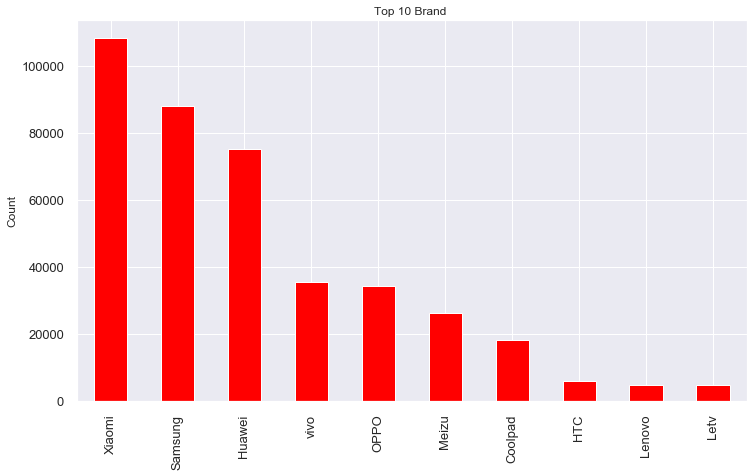

In [102]:
Topbrands=branddf['new brand'].value_counts()[:10].plot(kind='bar', figsize=(12,7), fontsize=13, color='red')
plt.ylabel('Count')
plt.title('Top 10 Brand ')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'top 5 state in Mobile uses')

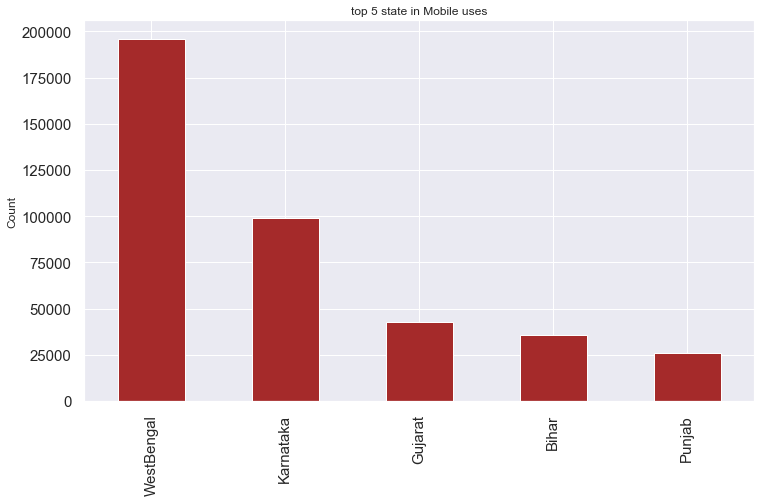

In [103]:
Top_state=branddf['state'].value_counts()[0:5].plot(kind='bar', figsize=(12,7), fontsize=15, color='brown')
plt.ylabel('Count')
plt.title('top 5 state in Mobile uses')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'top 5 city in Mobile uses')

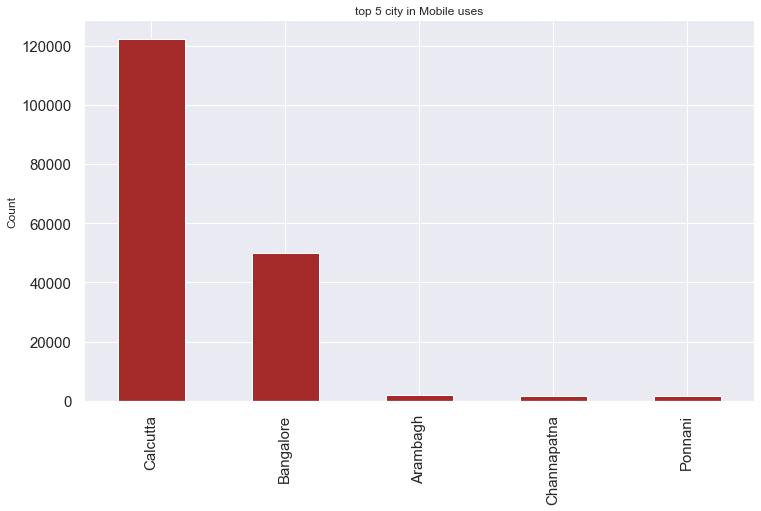

In [104]:
Top_city=branddf['city'].value_counts()[0:5].plot(kind='bar', figsize=(12,7), fontsize=15, color='brown')
plt.ylabel('Count')
plt.title('top 5 city in Mobile uses')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Bottom 5 city in Mobile uses')

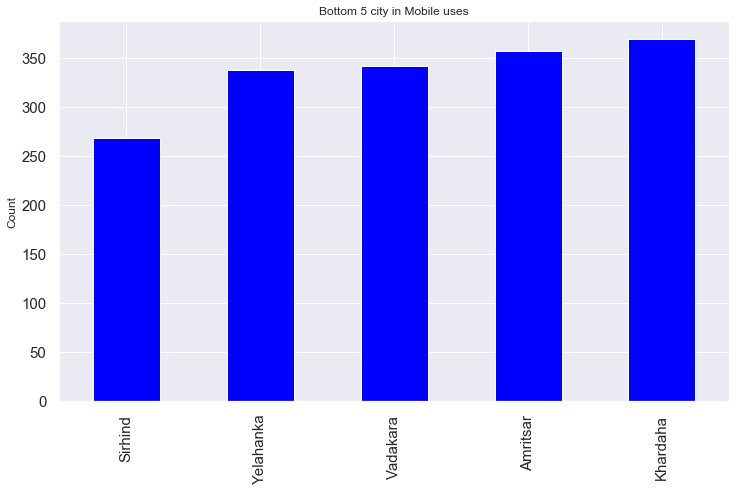

In [105]:
Bottam_city=branddf['city'].value_counts()[-1:-6:-1].plot(kind='bar', figsize=(12,7), fontsize=15, color='blue')
plt.ylabel('Count')
plt.title('Bottom 5 city in Mobile uses')

Text(0, 0.5, 'Mobile brands')

Text(0.5, 1.0, 'Donut Plot showing the mobile brand proportion ')

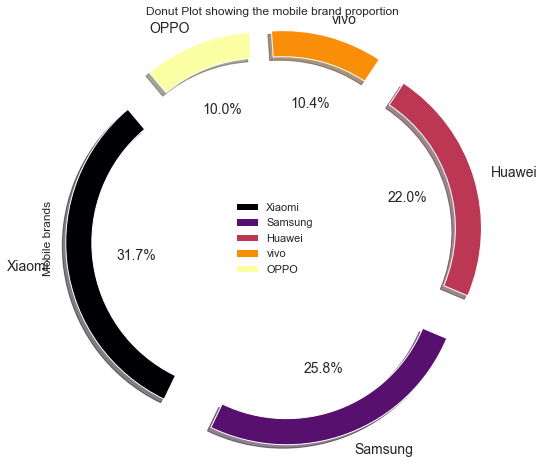

In [106]:
space = np.ones(5)/5
branddf['new brand'].value_counts()[:5].plot(kind='pie', explode=space, fontsize=14, autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                       shadow=True, startangle=130, figsize=(8,8), cmap='inferno', legend=True)

plt.ylabel('Mobile brands')
plt.title('Donut Plot showing the mobile brand proportion ')

In [107]:
#Gender distribution of the sample

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Gender Counts')

Text(0.5, 0, 'Gender')

Text(0, 0.5, 'Frequency')

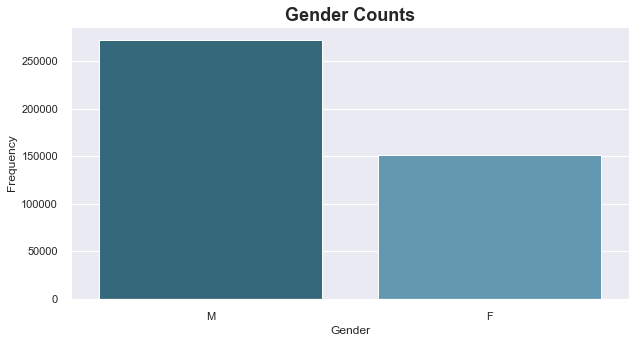

In [108]:
plt.figure(figsize=(10,5))
sns.countplot('gender',data = branddf, order = branddf['gender'].value_counts().index,palette="PuBuGn_d")
plt.title("Gender Counts",fontsize=18,fontweight="bold")
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

In [109]:
branddf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422915 entries, 0 to 422914
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   event_id       422915 non-null  int64         
 1   device_id      422915 non-null  object        
 2   timestamp      422915 non-null  datetime64[ns]
 3   longitude      422873 non-null  float64       
 4   latitude       422873 non-null  float64       
 5   city           422915 non-null  object        
 6   state          422915 non-null  object        
 7   gender         422915 non-null  object        
 8   age            422915 non-null  int64         
 9   Gen_age_range  422915 non-null  object        
 10  brand          422915 non-null  object        
 11  model          422915 non-null  object        
 12  new brand      422915 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 65.2+ MB


In [110]:
df_datetime= branddf.set_index('timestamp')

In [111]:
df_datetime.head()

event_id             device_id  longitude   latitude  \
timestamp                                                                   
2016-05-01 20:44:16   2955066   4734221357723754978  88.388361  22.660325   
2016-05-01 14:07:23    769546  -1817502319478569661  88.371813  22.662852   
2016-05-05 15:47:03   1750603  -5598137337131306950  70.212684  23.118370   
2016-05-07 01:25:47   3085968  -3808296883972395680  75.513019  11.812367   
2016-05-03 20:01:35   1407594  -2995507760806350372  77.805194  13.533295   

                             city       state gender  age Gen_age_range brand  \
timestamp                                                                       
2016-05-01 20:44:16      Calcutta  WestBengal      M   30        M29-31  vivo   
2016-05-01 14:07:23      Calcutta  WestBengal      F   43          F43+  OPPO   
2016-05-05 15:47:03    Gandhidham     Gujarat      M   23        M23-26    魅族   
2016-05-07 01:25:47    Thalassery      Kerala      M   24        M23-26  vivo   
2016-05-03 20:01:35  ChikBallapur   Karnataka      M   29        M29-31  OPPO   

                       model new brand  
timestamp                               
2016-05-01 20:44:16      X5M      vivo  
2016-05-01 14:07:23    R819T      OPPO  
2016-05-05 15:47:03      MX3     Meizu  
2016-05-07 01:25:47      X5L      vivo  
2016-05-03 20:01:35  R7 Plus      OPPO

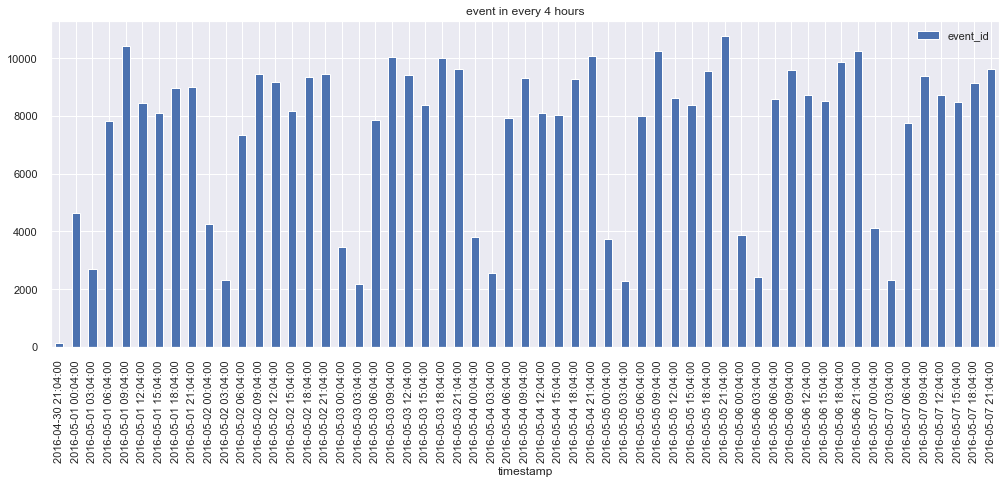

In [112]:
#df_datetime[['event_id']].resample(rule='D').count().plot.bar()
df_datetime[['event_id']].resample(rule='3H',loffset='4T').count().plot.bar(figsize=(17,6), title="event in every 4 hours");
#df['4min_offset'] = minutes.resample('2min',loffset='4T').sum()

In [113]:
df_datetime.index

DatetimeIndex(['2016-05-01 20:44:16', '2016-05-01 14:07:23',
               '2016-05-05 15:47:03', '2016-05-07 01:25:47',
               '2016-05-03 20:01:35', '2016-05-05 09:28:24',
               '2016-05-02 20:10:01', '2016-05-05 19:29:39',
               '2016-05-02 23:25:30', '2016-05-01 14:35:55',
               ...
               '2016-05-06 13:06:53', '2016-05-04 22:08:49',
               '2016-05-02 10:55:28', '2016-05-02 23:34:22',
               '2016-05-03 12:35:33', '2016-05-04 22:29:48',
               '2016-05-01 13:17:54', '2016-05-06 07:07:15',
               '2016-05-03 05:53:58', '2016-05-07 09:01:45'],
              dtype='datetime64[ns]', name='timestamp', length=422915, freq=None)

In [114]:
#titanic_data['GenderClass'] = titanic_data.apply(lambda x: 'child' if x['Age'] < 15 else x['Sex'],axis=1)
df_datetime['GenderClass']=df_datetime.apply(lambda x: 'C' if x['age'] < 18 else x['gender'], axis=1)

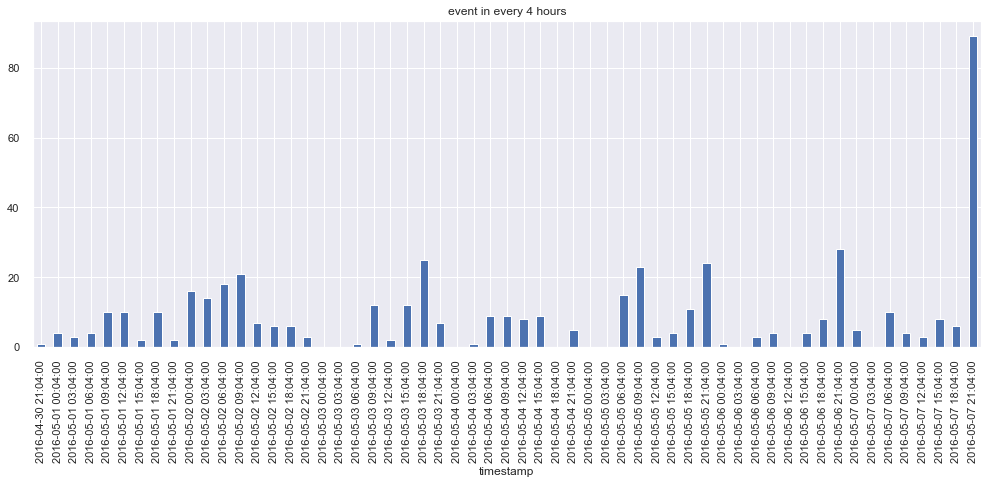

In [115]:

df_datetime[df_datetime.age<16]['event_id'].resample(rule='3H',loffset='4T').count().plot.bar(figsize=(17,6), title="event in every 4 hours");



<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Gender Counts')

Text(0.5, 0, 'GenderClass')

Text(0, 0.5, 'Frequency')

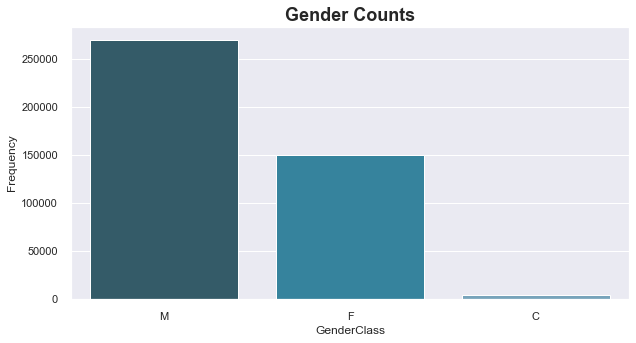

In [116]:
plt.figure(figsize=(10,5))
sns.countplot('GenderClass',data = df_datetime, order = df_datetime['GenderClass'].value_counts().index,palette="PuBuGn_d")
plt.title("Gender Counts",fontsize=18,fontweight="bold")
plt.xlabel('GenderClass')
plt.ylabel('Frequency')
plt.show()

<Figure size 1080x360 with 0 Axes>

Text(0.5, 1.0, 'Age Distribution of users')

<Figure size 1080x360 with 0 Axes>

Text(0.5, 1.0, 'Age Distribution of users - Female')

<Figure size 1080x360 with 0 Axes>

Text(0.5, 1.0, 'Age Distribution of users - Male')

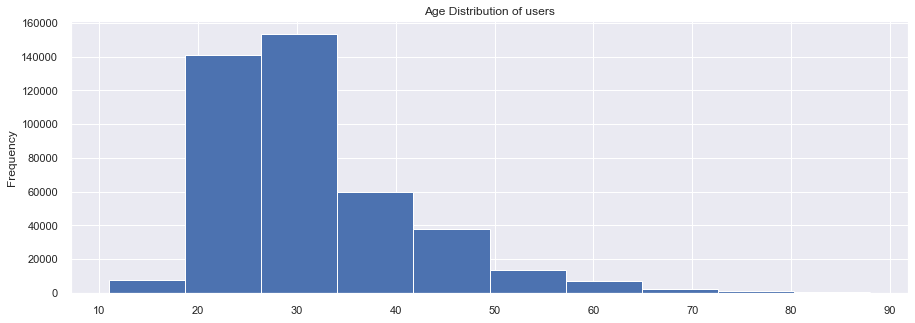

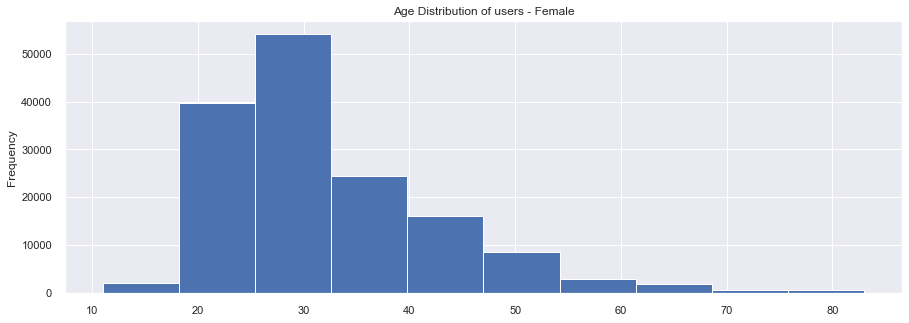

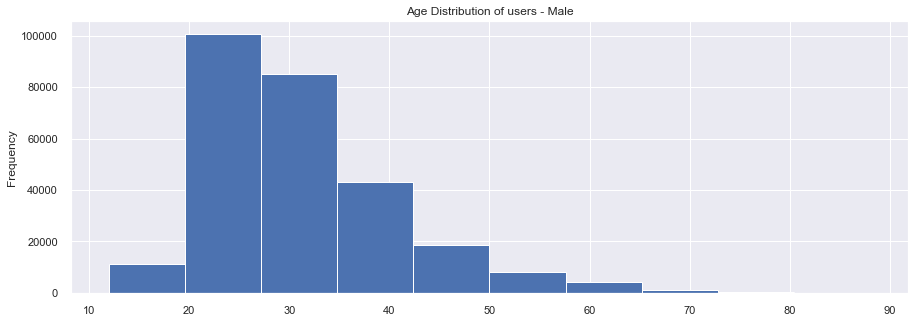

In [117]:
plt.figure(figsize=(15,5))
y = df_datetime["age"]
y.plot(kind = 'hist')
plt.title('Age Distribution of users')

plt.figure(figsize=(15,5))
y1 = df_datetime[df_datetime['gender']=='F']["age"]
y1.plot(kind = 'hist')
plt.title('Age Distribution of users - Female')

plt.figure(figsize=(15,5))
y2 = df_datetime[df_datetime['gender']=='M']["age"]
y2.plot(kind = 'hist')
plt.title('Age Distribution of users - Male')

In [118]:

df_datetime.head()

event_id             device_id  longitude   latitude  \
timestamp                                                                   
2016-05-01 20:44:16   2955066   4734221357723754978  88.388361  22.660325   
2016-05-01 14:07:23    769546  -1817502319478569661  88.371813  22.662852   
2016-05-05 15:47:03   1750603  -5598137337131306950  70.212684  23.118370   
2016-05-07 01:25:47   3085968  -3808296883972395680  75.513019  11.812367   
2016-05-03 20:01:35   1407594  -2995507760806350372  77.805194  13.533295   

                             city       state gender  age Gen_age_range brand  \
timestamp                                                                       
2016-05-01 20:44:16      Calcutta  WestBengal      M   30        M29-31  vivo   
2016-05-01 14:07:23      Calcutta  WestBengal      F   43          F43+  OPPO   
2016-05-05 15:47:03    Gandhidham     Gujarat      M   23        M23-26    魅族   
2016-05-07 01:25:47    Thalassery      Kerala      M   24        M23-26  vivo   
2016-05-03 20:01:35  ChikBallapur   Karnataka      M   29        M29-31  OPPO   

                       model new brand GenderClass  
timestamp                                           
2016-05-01 20:44:16      X5M      vivo           M  
2016-05-01 14:07:23    R819T      OPPO           F  
2016-05-05 15:47:03      MX3     Meizu           M  
2016-05-07 01:25:47      X5L      vivo           M  
2016-05-03 20:01:35  R7 Plus      OPPO           M

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Top 10 Brand ')

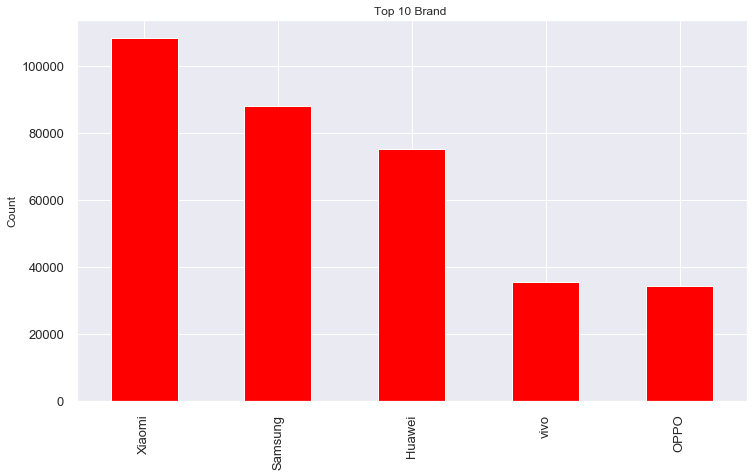

In [119]:
Topbrands=branddf['new brand'].value_counts()[:5].plot(kind='bar', figsize=(12,7), fontsize=13, color='red')
plt.ylabel('Count')
plt.title('Top 10 Brand ')

<Figure size 1440x2880 with 0 Axes>

Text(0.5, 1.0, 'Bihar')

Text(0.5, 1.0, 'Gujarat')

Text(0.5, 1.0, 'Karnataka')

Text(0.5, 1.0, 'Kerala')

Text(0.5, 1.0, 'Punjab')

Text(0.5, 1.0, 'WestBengal')

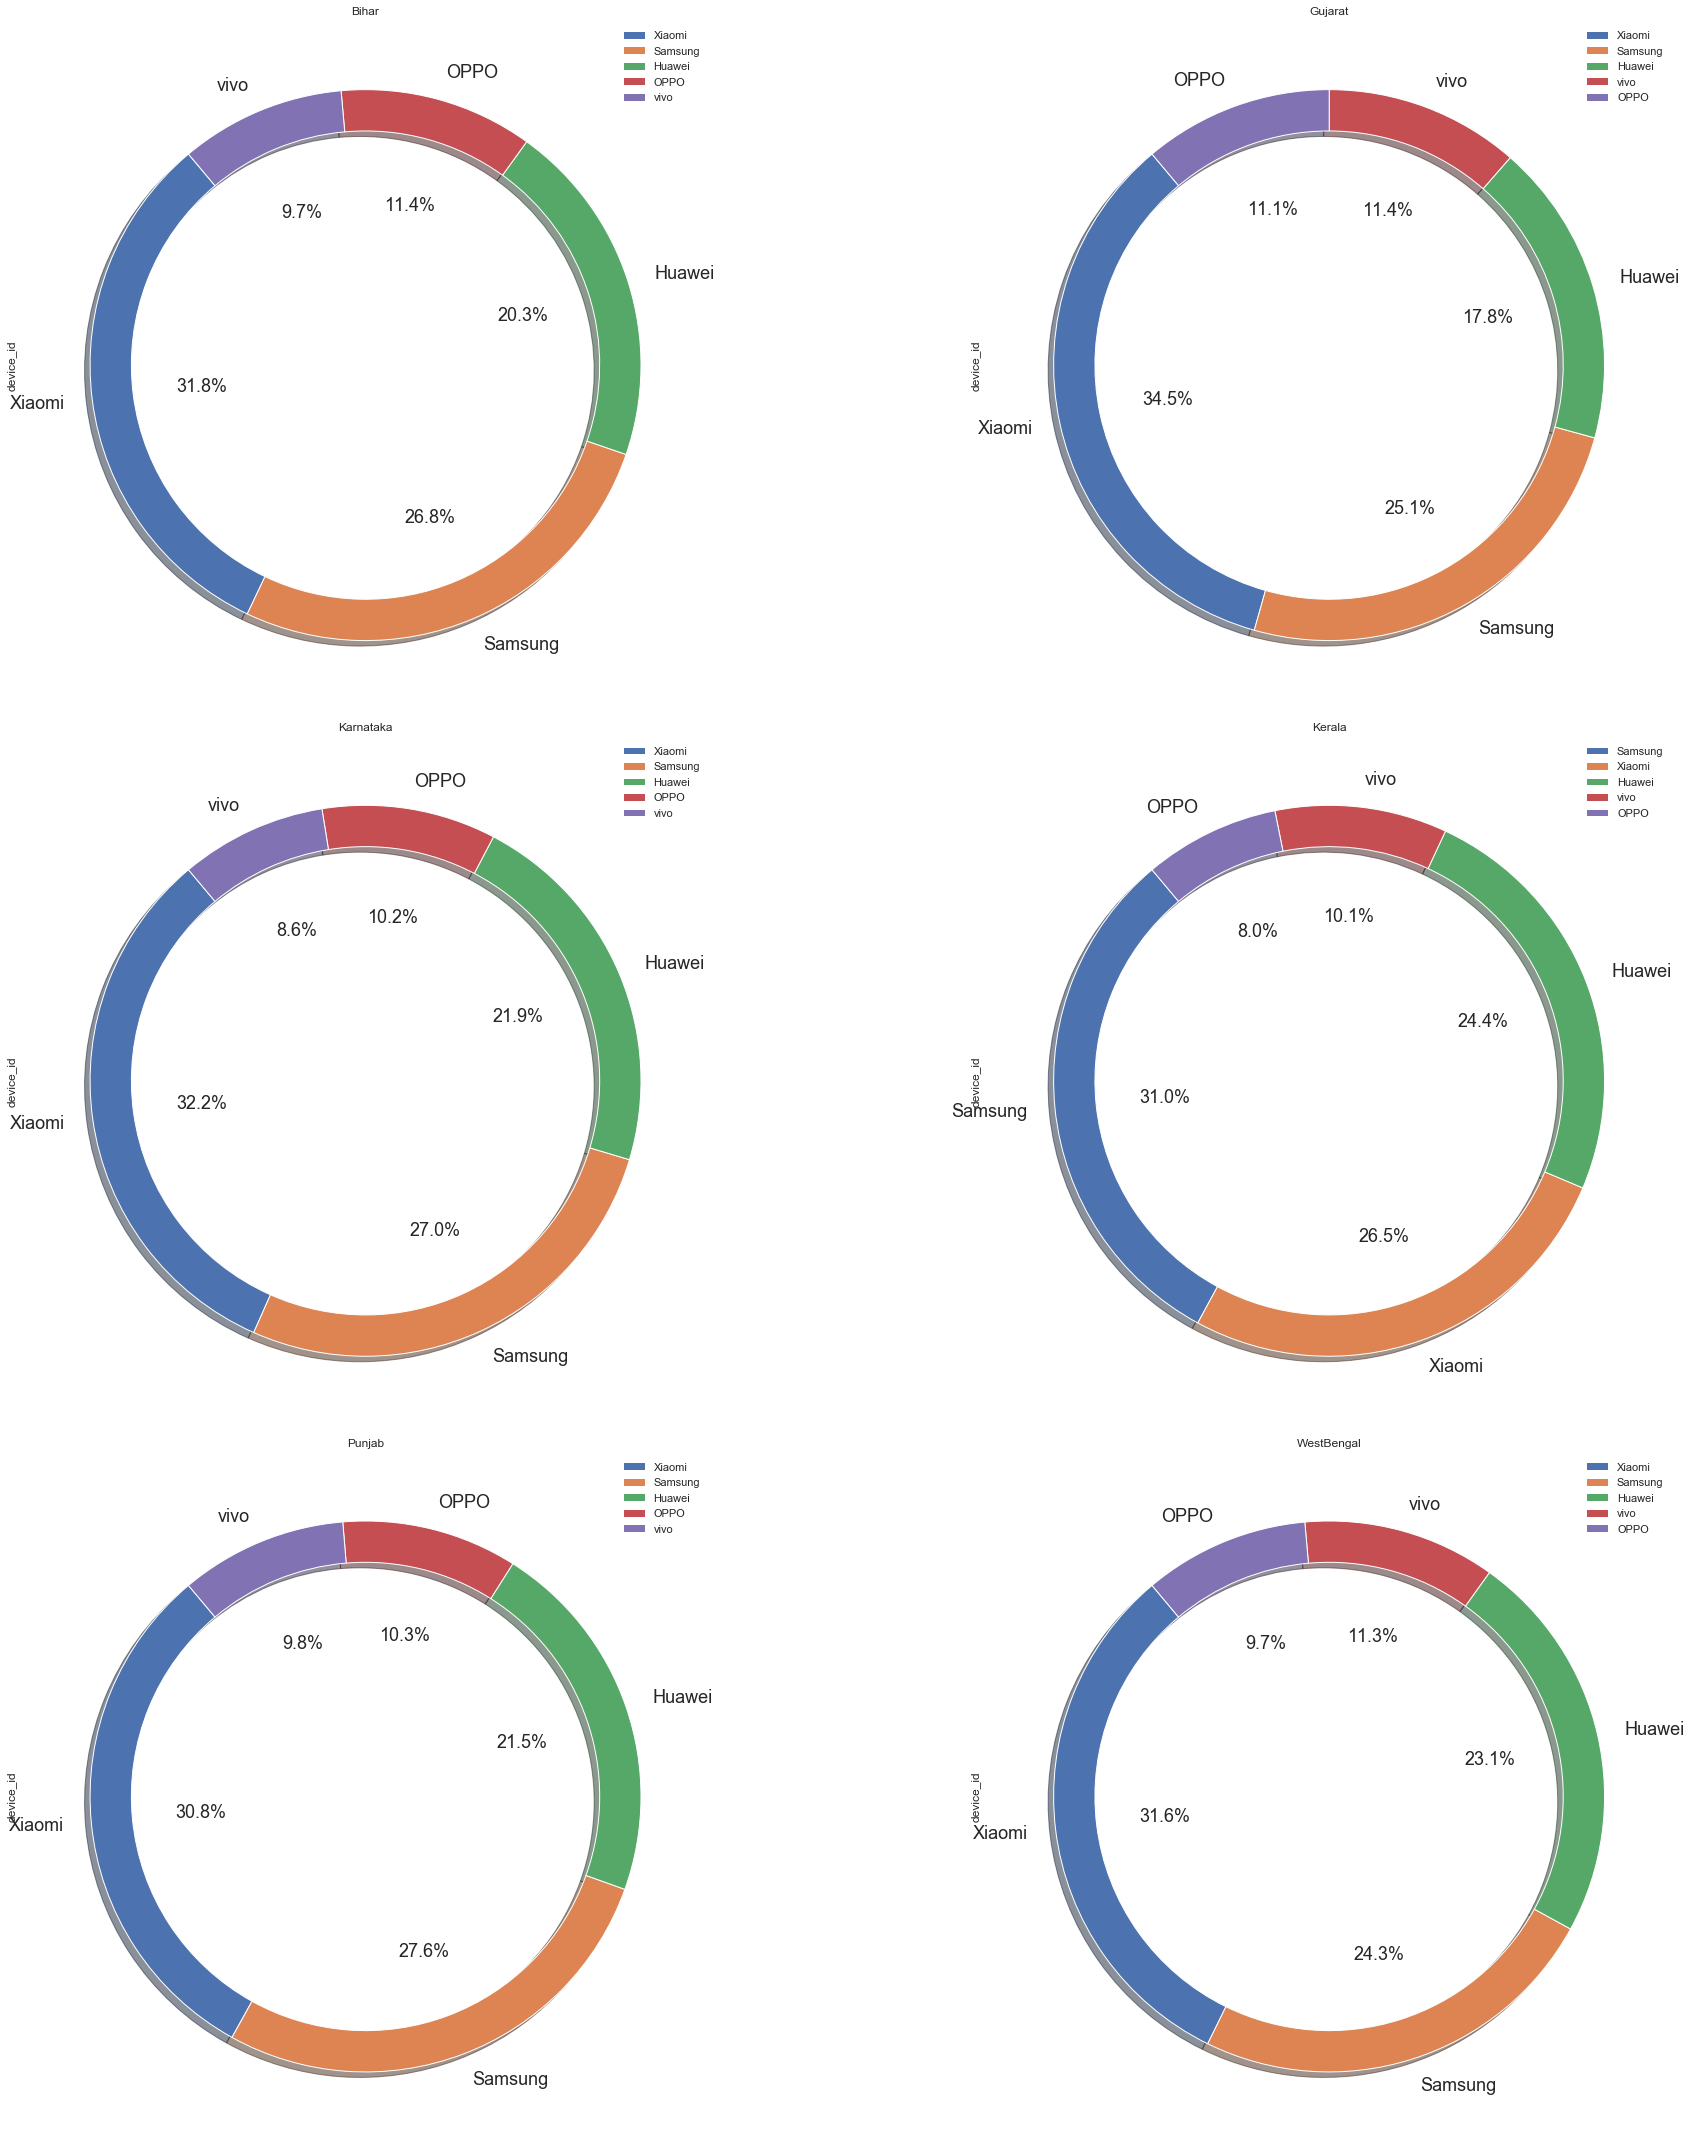

In [120]:
# Make the graph 20 inches by 40 inches
plt.figure(figsize=(20,40), facecolor='white')

# plot numbering starts at 1, not 0
plot_number = 1
for state, selection in branddf.groupby("state"):
    # Inside of an image that's a 15x13 grid, put this
    # graph in the in the plot_number slot.
    ax = plt.subplot(3, 2, plot_number)
    #selection['new brand'].value_counts()[:5].sort_values(ascending = True).plot(kind='bar',fontsize=13, figsize=(30,30))
    selection.groupby(['new brand'])['device_id'].count().sort_values(ascending = False)[0:5].plot(kind='pie', fontsize=18, autopct='%3.1f%%', wedgeprops=dict(width=0.15), shadow=True, startangle=130, figsize=(30,30), legend=True)
    #.value_counts()[:5].plot(kind='pie', fontsize=16, autopct='%3.1f%%', wedgeprops=dict(width=0.15), shadow=True, startangle=130, figsize=(30,30), legend=True)
    ax.set_title(state)
    # Go to the next plot for the next loop
    plot_number = plot_number + 1
plt.tight_layout()



#plt.ylabel('Mobile brands')
#plt.title('Donut Plot showing the mobile brand proportion ')

In [122]:
top_10=df_datetime[df_datetime['state']=='Gujarat']

In [123]:
for i in list(pd.DataFrame(df_datetime[df_datetime['state']==j]['new brand'].value_counts(ascending = False)[:10])):
    print(i)


new brand


In [124]:
for j in ['Bihar','Gujarat','Karnataka','Kerala', 'Punjab','WestBengal']:
    select_state = df_datetime[df_datetime['state']==j]
    for in list
    y= select_state['new brand'].value_counts(ascending = False)[:10].plot(stacked=True,kind='bar', figsize=(12,7), fontsize=13, color='red')
    plt.ylabel(f'Top 10 Phone Brands - {j}')


SyntaxError: invalid syntax (<ipython-input-124-16f82e83a7c4>, line 3)

<Figure size 720x720 with 0 Axes>

Text(0.5, 1, 'Correlation between features')

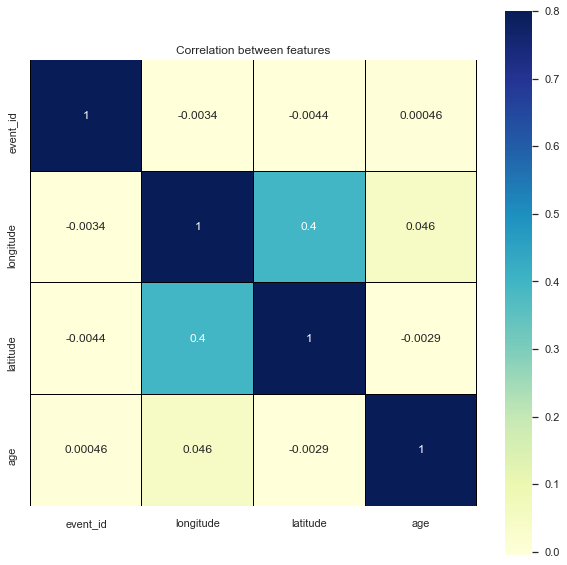

In [125]:
corr = df_datetime.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

In [126]:
# folium for latitude and logitude
df_datetime.head()

event_id             device_id  longitude   latitude  \
timestamp                                                                   
2016-05-01 20:44:16   2955066   4734221357723754978  88.388361  22.660325   
2016-05-01 14:07:23    769546  -1817502319478569661  88.371813  22.662852   
2016-05-05 15:47:03   1750603  -5598137337131306950  70.212684  23.118370   
2016-05-07 01:25:47   3085968  -3808296883972395680  75.513019  11.812367   
2016-05-03 20:01:35   1407594  -2995507760806350372  77.805194  13.533295   

                             city       state gender  age Gen_age_range brand  \
timestamp                                                                       
2016-05-01 20:44:16      Calcutta  WestBengal      M   30        M29-31  vivo   
2016-05-01 14:07:23      Calcutta  WestBengal      F   43          F43+  OPPO   
2016-05-05 15:47:03    Gandhidham     Gujarat      M   23        M23-26    魅族   
2016-05-07 01:25:47    Thalassery      Kerala      M   24        M23-26  vivo   
2016-05-03 20:01:35  ChikBallapur   Karnataka      M   29        M29-31  OPPO   

                       model new brand GenderClass  
timestamp                                           
2016-05-01 20:44:16      X5M      vivo           M  
2016-05-01 14:07:23    R819T      OPPO           F  
2016-05-05 15:47:03      MX3     Meizu           M  
2016-05-07 01:25:47      X5L      vivo           M  
2016-05-03 20:01:35  R7 Plus      OPPO           M

In [152]:
city_df =df_datetime[['city','state','latitude','longitude'] ]
city_df.head()
#data.drop_duplicates(subset ="First Name", keep = False, inplace = True) 
city_df.drop_duplicates(subset ="latitude", keep = False, inplace = True)


city       state   latitude  longitude
timestamp                                                          
2016-05-01 20:44:16      Calcutta  WestBengal  22.660325  88.388361
2016-05-01 14:07:23      Calcutta  WestBengal  22.662852  88.371813
2016-05-05 15:47:03    Gandhidham     Gujarat  23.118370  70.212684
2016-05-07 01:25:47    Thalassery      Kerala  11.812367  75.513019
2016-05-03 20:01:35  ChikBallapur   Karnataka  13.533295  77.805194

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



city       state   latitude  longitude
timestamp                                                        
2016-05-05 15:47:03  Gandhidham     Gujarat  23.118370  70.212684
2016-05-07 15:21:44     Manjeri      Kerala  11.150658  76.187501
2016-05-02 19:24:27      Hospet   Karnataka  15.328617  76.469270
2016-05-01 03:13:04  Barddhaman  WestBengal  23.301245  87.877363
2016-05-06 06:52:20       Ilkal   Karnataka  15.988656  76.216328

In [1]:
city_df.info()
city_df.head()

NameError: name 'city_df' is not defined

In [155]:
lat = city_df['latitude'].tolist()
long = city_df['longitude'].tolist()

In [160]:
!pip3 install folium

  Using cached https://files.pythonhosted.org/packages/a4/f0/44e69d50519880287cc41e7c8a6acc58daa9a9acf5f6afc52bcc70f69a6d/folium-0.11.0-py2.py3-none-any.whl
    100% |████████████████████████████████| 15.3MB 1.5MB/s ta 0:00:011    98% |███████████████████████████████▍| 15.0MB 3.4MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/13/fb/9eacc24ba3216510c6b59a4ea1cd53d87f25ba76237d7f4393abeaf4c94e/branca-0.4.1-py3-none-any.whl
    100% |████████████████████████████████| 71kB 3.2MB/s ta 0:00:011
    100% |████████████████████████████████| 143kB 3.9MB/s ta 0:00:01
    100% |████████████████████████████████| 133kB 4.1MB/s ta 0:00:01
    100% |████████████████████████████████| 163kB 4.2MB/s ta 0:00:01
    100% |████████████████████████████████| 61kB 3.4MB/s ta 0:00:011


In [3]:
import folium
import folium.plugins as plugins

In [165]:
coordinates =[]
mapa = folium.Map(location=[23.118370, 70.212684])
# Append latitude and longitude coordinates array
for la,lo in zip(lat,long):
    coordinates.append([la,lo])
   
# We have about 700000 lines, but jupyter notebook ins't possible to show all these points.
# To impress all data you can salve as a html file 
#mapa.save("map.html")
# Or to show onlye a piece
mapa.add_child(plugins.HeatMap(coordinates[0:40000]))

In [166]:
map2 = folium.Map(location=[23.118370, 70.212684])
#for la,lo in zip(lat[0:500],long[0:500]):
for la,lo in zip(lat,long):
    folium.Marker(
        location=[la,lo],
        icon=folium.Icon(icon_color='white')
    ).add_to(map2)
# Plotting 
map2

<a id=section3></a>

## 3. Preprocessing the data

- Dealing with missing values<br/>
    - Dropping/Replacing missing entries of __Embarked.__
    - Replacing missing values of __Age__ with median values.
    - Dropping the column __'Cabin'__ as it has too many _null_ values.
    - Replacing 0 values of fare with median values.

In [27]:
titanic_data.Embarked = titanic_data.Embarked.fillna(titanic_data['Embarked'].mode()[0])

In [28]:
median_age = titanic_data.Age.median()
titanic_data.Age.fillna(median_age, inplace = True)

In [29]:
titanic_data.drop('Cabin', axis = 1,inplace = True)

In [30]:
titanic_data['Fare']=titanic_data['Fare'].replace(0,titanic_data['Fare'].median())

- Creating a new feature named __FamilySize__.

In [31]:
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch']+1

- Segmenting __Sex__ column as per __Age__, Age less than 15 as __Child__, Age greater than 15 as __Males and Females__ as per their gender.

In [32]:
titanic_data['GenderClass'] = titanic_data.apply(lambda x: 'child' if x['Age'] < 15 else x['Sex'],axis=1)

In [33]:
titanic_data[titanic_data.Age<15].head(2)

PassengerId  Survived  Pclass                                 Name     Sex  \
7            8         0       3       Palsson, Master. Gosta Leonard    male   
9           10         1       2  Nasser, Mrs. Nicholas (Adele Achem)  female   

    Age  SibSp  Parch  Ticket     Fare Embarked  FamilySize GenderClass  
7   2.0      3      1  349909  21.0750        S           5       child  
9  14.0      1      0  237736  30.0708        C           2       child

In [34]:
titanic_data[titanic_data.Age>15].head(2)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Embarked  FamilySize GenderClass  
0      0  A/5 21171   7.2500        S           2        male  
1      0   PC 17599  71.2833        C           2      female

- __Dummification__ of __GenderClass__ & __Embarked__.

In [35]:
titanic_data = pd.get_dummies(titanic_data, columns=['GenderClass','Embarked'], drop_first=True)

- __Dropping__ columns __'Name' , 'Ticket' , 'Sex' , 'SibSp' and 'Parch'__ 

In [36]:
titanic = titanic_data.drop(['Name','Ticket','Sex','SibSp','Parch'], axis = 1)
titanic.head()

PassengerId  Survived  Pclass   Age     Fare  FamilySize  \
0            1         0       3  22.0   7.2500           2   
1            2         1       1  38.0  71.2833           2   
2            3         1       3  26.0   7.9250           1   
3            4         1       1  35.0  53.1000           2   
4            5         0       3  35.0   8.0500           1   

   GenderClass_female  GenderClass_male  Embarked_Q  Embarked_S  
0                   0                 1           0           1  
1                   1                 0           0           0  
2                   1                 0           0           1  
3                   1                 0           0           1  
4                   0                 1           0           1

Drawing __pair plot__ to know the joint relationship between __'Fare' , 'Age' , 'Pclass' & 'Survived'__

Text(0.5, 1.0, 'Pair Plot')

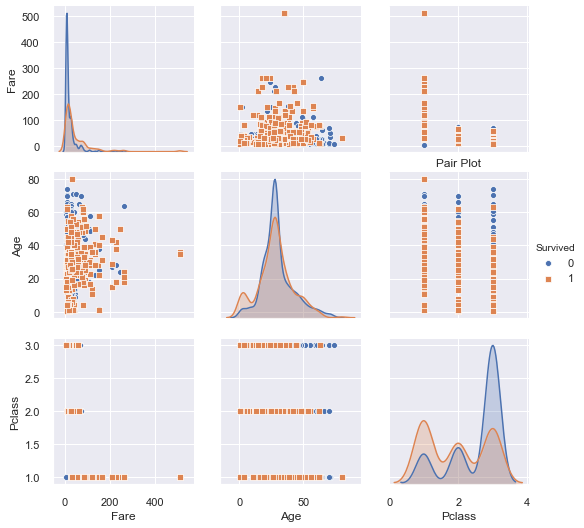

In [37]:
sns.pairplot(titanic_data[["Fare","Age","Pclass","Survived"]],vars = ["Fare","Age","Pclass"],hue="Survived", dropna=True,markers=["o", "s"])
plt.title('Pair Plot')

Observing the diagonal elements,
- More people of __Pclass 1__ _survived_ than died (First peak of red is higher than blue)
- More people of __Pclass 3__ _died_ than survived (Third peak of blue is higher than red)
- More people of age group __20-40 died__ than survived.
- Most of the people paying __less fare died__.

Establishing __coorelation__ between all the features using __heatmap__.

Text(0.5, 1.0, 'Correlation between features')

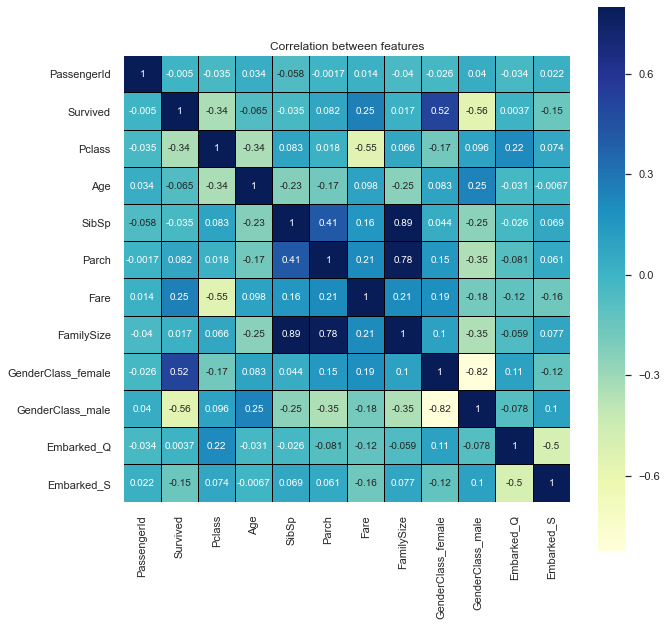

In [38]:
corr = titanic_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

- __Age and Pclass are negatively corelated with Survived.__
- FamilySize is made from Parch and SibSb only therefore high positive corelation among them.
- __Fare and FamilySize__ are __positively coorelated with Survived.__
- With high corelation we face __redundancy__ issues.

<a id = section4></a>

## 4. Decision Tree

<a id = section401></a>

### 4.1 Introduction of Decision Tree

A __decision tree__ is one of most frequently and widely used supervised machine learning algorithms that can perform both __regression and classification tasks.__<br/>
The intuition behind the decision tree algorithm is simple, yet also very powerful.<br/>

Everyday we need to make numerous __decisions__, many smalls and a few big.<br>
So, Whenever you are in a dilemna, if you'll keenly observe your thinking process. You'll find that, you are unconsciously using __decision tree approcah__ or you can also say that decision tree approach is based on our thinking process. <br/>
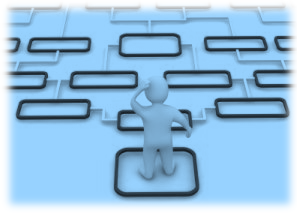
- A decision tree __split the data into multiple sets__.Then each of these sets is further split into subsets to arrive at a __decision__.<br/>
- It is a very natural decision making process asking a series of question in a nested if then else statement.
- On each node you ask a question to further split the data held by the node. <br/>




So, lets understand what is a decision tree with a help of a real life example.<br>


Consider a scenario where a person asks you to lend them your car for a day, and you have to make a decision whether or not to lend them the car. There are several factors that help determine your decision, some of which have been listed below:

1. __Is this person a close friend or just an acquaintance?__
 - If the person is just an acquaintance, then decline the request;
 - if the person is friend, then move to next step.

2. __Is the person asking for the car for the first time?__
 - If so, lend them the car,
 - otherwise move to next step.

3. __Was the car damaged last time they returned the car?__
 - If yes, decline the request; 
 - if no, lend them the car.<br/>
 
The decision tree for the aforementioned scenario looks like this:
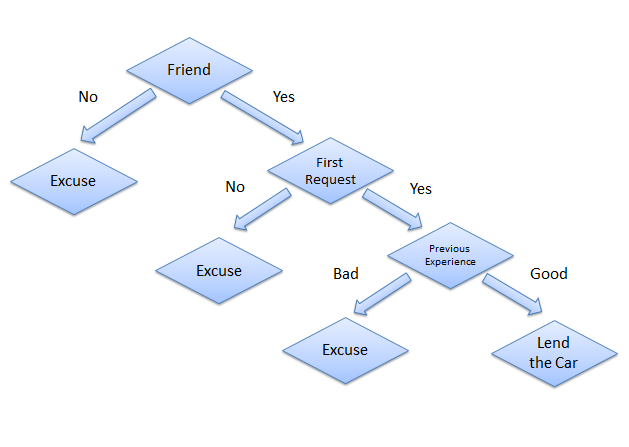

The structure of decision tree resembles an __upside down tree__, with its roots at the top and braches are at the bottom. The end of the branch that doesnt split any more is the decision or leaf.
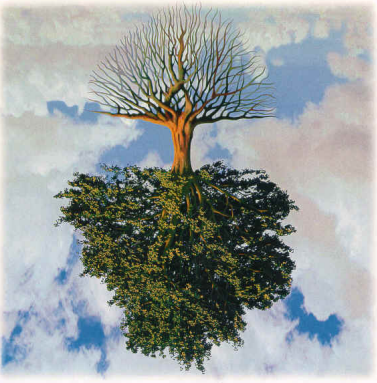

Now, lets see what is __Decision tree algorithm.__<br/> 
Decision tree is a type of __supervised learning algorithm__ (having a pre-defined target variable) that is mostly used in classification problems.
- It works for both __categorical and continuous__ input and output variables.
- In this technique, we __split the population__ or sample into two or more homogeneous sets (or sub-populations) based on most __significant splitter / differentiator__ in input variables.

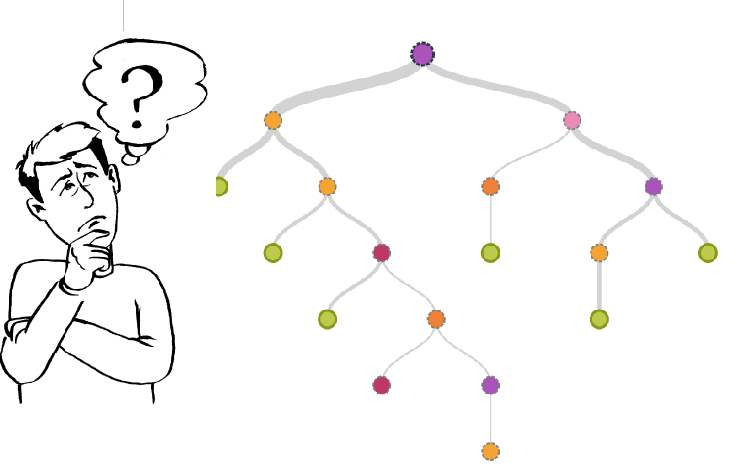

<a id = section402></a>

### 4.2 Important Terminology related to Decision Trees

Let’s look at the basic terminology used with Decision trees:

- __Root Node__: <br/>It represents entire population or sample and this further gets divided into two or more homogeneous sets.
- __Splitting__: <br/>It is a process of dividing a node into two or more sub-nodes.
- __Decision Node__:<br/> When a sub-node splits into further sub-nodes, then it is called decision node.
- __Leaf/ Terminal Node__:<br/> Nodes do not split is called Leaf or Terminal node.
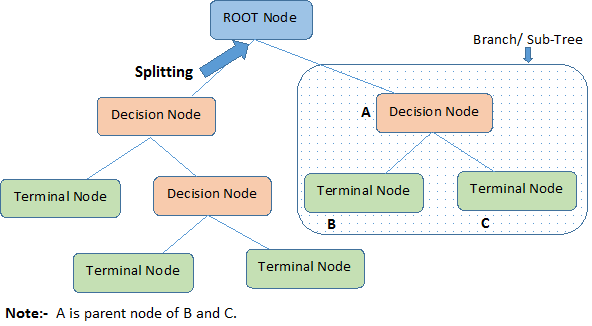

- __Pruning__:<br/> When we remove sub-nodes of a decision node, this process is called pruning. You can say opposite process of splitting.
- __Branch / Sub-Tree__:<br/> A sub section of entire tree is called branch or sub-tree.
- __Parent and Child Node__:<br/> A node, which is divided into sub-nodes is called parent node of sub-nodes where as sub-nodes are the child of parent node.

<a id = section403></a>

### 4.3 Types of Decision Trees

Types of decision tree is based on the __type of target variable__ we have. It can be of two types:

- __Categorical Variable Decision Tree__: <br/>
 - Decision Tree which has __categorical target variable__ then it called as categorical variable decision tree.
- __Continuous Variable Decision Tree__:<br/>
 - Decision Tree has __continuous target variable__ then it is called as Continuous Variable Decision Tree.<br/>
 
__Example__:<br/>
- Let’s say we have a problem to predict whether a customer will pay his renewal premium with an insurance company (__Yes/ No__).<br/> For this we are predicting values for categorical variable. So, the decision tree approach that will be used is __Categorical Variable Decision Tree.__ <br/>
- Now, suppose insurance company does not have income details for all customers. But, we know that this is an important variable, then we can build a decision tree to predict customer income based on occupation, product and various other variables.<br/> In this case, we are predicting values for continuous variable. So , This approach is called __Continuous Variable Decision Tree__.

<a id = section404></a>

### 4.4 Concept of Homogenity

__Homogenous__ populations are __alike__ and __heterogeneous__ populations are __unlike__.<br/>
- A heterogenous population is one where individuals are __not similar__ to one another.<br/>
- For example, you could have a heterogenous population in terms of humans that have migrated from different regions of the world and currently live together. That population would likely be heterogenous in regards to height, hair texture, disease immunity, and other traits because of the varied background and genetics.

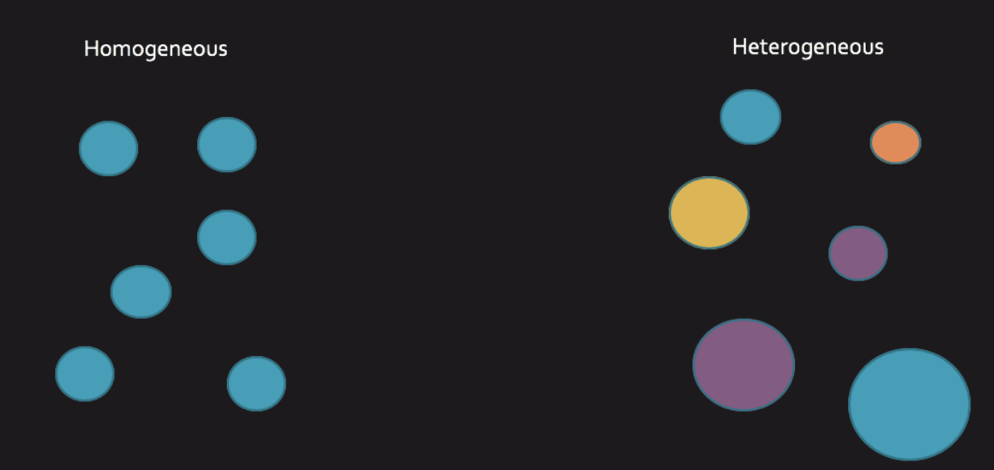

__Note__: In real world you would never get this level of homogeniety. So out of the hetrogenous options you need to select the one having maximum homoginiety. To select the feature which provide maximum homoginety we use __gini & entropy__ techniques.

What Decision tree construction algorithm will try to do is to __create a split in such a way that the homogeneity of different pieces must be as high as possible.__

__Example__

Let’s say we have a sample of __30 students__ with three variables:
1. Gender (Boy/ Girl)
2. Class (IX/ X) and,
3. Height (5 to 6 ft).<br/>

15 out of these 30 play cricket in leisure time. Now, I want to __create a model to predict who will play cricket during leisure period__? In this problem, we need to segregate students who play cricket in their leisure time based on highly significant input variable among all three.

This is where decision tree helps, it will segregate the students based on all values of three variables and identify the variable, which creates the best homogeneous sets of students (which are heterogeneous to each other). In the snapshot below, you can see that variable __Gender__ is able to identify best homogeneous sets compared to the other two variables.
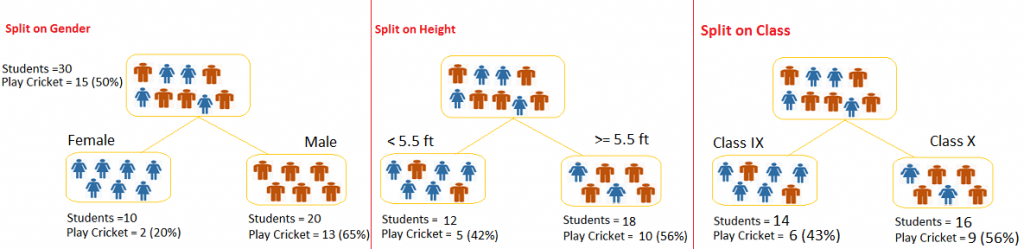 

As mentioned above, decision tree identifies the most significant variable and it’s value that gives best homogeneous sets of population. Now the question which arises is, how does it identify the variable and the split? To do this, decision tree uses various algorithms, which we will shall discuss in the following section.

<a id = section405></a>

### 4.5 How does a tree decide where to split?
The decision of making strategic splits heavily affects a tree’s accuracy. The decision criteria is different for classification and regression trees.

Decision trees use multiple algorithms to decide to split a node in two or more sub-nodes. The creation of sub-nodes increases the homogeneity of resultant sub-nodes. In other words, we can say that purity of the node increases with respect to the target variable. Decision tree splits the nodes on all available variables and then selects the split which results in most homogeneous sub-nodes.

The algorithm selection is also based on type of target variables. Let’s look at the most commonly used algorithms in decision tree:

 

<a id = GiniIndex></a>

#### 4.5.1 Gini Index
Gini index says, if we select two items from a population at random then they must be of same class and probability for this is 1 if population is pure.

- It works with categorical target variable “Success” or “Failure”.
- It performs only Binary splits
- Higher the value of Gini higher the homogeneity.
- CART (Classification and Regression Tree) uses Gini method to create binary splits.

__Steps to Calculate Gini for a split__

1. Calculate Gini for sub-nodes, using formula sum of square of probability for success and failure (1 `-` p<sup>2</sup> `-` q<sup>2</sup>).
2. Calculate Gini for split using weighted Gini score of each node of that split


__Example__: 
– Referring to example used above, where we want to segregate the students based on target variable ( playing cricket or not ). In the snapshot below, we split the population using two input variables Gender and Class. Now, I want to identify which split is producing more homogeneous sub-nodes using Gini index.
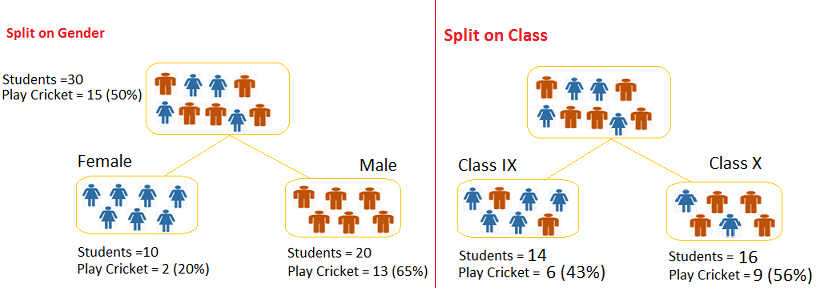


__Gini for Root node__: 
 - 1 `-` (0.5 `*` 0.5) `-` (0.5 `*` 0.5) = 0.50
 
__Split on Gender__:

1. Gini for sub-node __Female__
  - 1 `-` (0.2 `*` 0.2) `-` (0.8 `*` 0.8) = 0.32
  
  
2. Gini for sub-node __Male__
  - 1 `-` (0.65 `*` 0.65) `-` (0.35 `*` 0.35) = 0.45
  
  
3. Weighted Gini for Split __Gender__ 
  -  (10/30) `*` 0.32 `+` (20/30) `*` 0.45 = 0.41
  

__Split on Class__ : 

1. Gini for sub-node __Class IX__ =
  - 1 `-` (0.43 `*` 0.43) `-` (0.57 `*` 0.57) = 0.49
  
  
2. Gini for sub-node __Class X__ =
  - 1 `-` (0.56 `*` 0.56) `-` (0.44 `*` 0.44) = 0.49
  
  
3. Calculate weighted Gini for Split __Class__  
  - (14/30) `*` 0.51 `+` (16/30) `*` 0.51 = 0.49
  
  


Above, you can see that:
__Gini score__ for Split on __Gender__ __`<`__ Gini score for Split on __Class__.<br/>
Also, __Gini score__ for __Gender__ __`<`__ Gini score for __root node__.<br/>
Hence, the __node split will take place on Gender.__

<a id = InformationGain></a>

#### 4.5.2 Information Gain:
Look at the image below and think which node can be described easily.<br/>
I am sure, your answer is C because it requires less information as all values are similar. On the other hand, B requires more information to describe it and A requires the maximum information.<br/> In other words, we can say that __C is a Pure node, B is less Impure and A is more impure.__
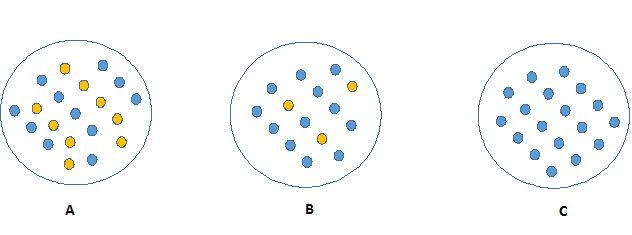

Now, we can build a conclusion that:
- less impure node requires less information to describe it.
- more impure node requires more information. 

Information theory is a measure to define this degree of disorganization in a system by a parameter known as __Entropy__.
- If the sample is completely __homogeneous__, then the __entropy is zero__ and<br/>
- If the sample is an __equally divided__ (50% – 50%), it has __entropy of one__.



### Entropy can be calculated using formula:

where,<br/>
__p__ & __q__ is __probability of success and failure__ respectively in that node.<br/> 
- __Information Gain = 1 - Entropy__.<br/>
- The model will choose the split which facilitates __maximum information gain__, which in turn means __minimum Entropy__.<br/>
- So, it chooses the split which has __lowest entropy__ compared to parent node and other splits.
- __The lesser the entropy, the better it is.__

__Steps to calculate entropy for a split__:

1. Calculate entropy of parent node
2. Calculate entropy of each individual node of split and 
3. Calculate weighted average of all sub-nodes available in split.
4. Caluclate the Information Gain in various split options w.r.t parent node
5. Choose the split with highest Information Gain.


Example: Let’s use this method to identify best split for student example.

 - __Entropy for parent node__
    - `-` (15/30) log2 (15/30) `–` (15/30) log2 (15/30) = 1.<br/>
      Here 1 shows that it is a impure node.
      
      
- __Entropy for Female node__ 
    - `-` (2/10) log2 (2/10) `–` (8/10) log2 (8/10) = 0.72 
    
    
- __Entropy for male node__
    - `-` (13/20) log2 (13/20) `–` (7/20) log2 (7/20) = 0.93
    
    
- __Entropy for split Gender__ = Weighted entropy of sub`-`nodes 
   - (10/30) `*` 0.72 + (20/30) `*` 0.93 = 0.86
   
-------------------------------------------------------------------------------------
- __Information Gain for split Gender__ = Entropy of Parent Node `-` Weighted entropy for Split Gender 
   - 1 `-` 0.86 = 0.14
-------------------------------------------------------------------------------------
   
   
   
- __Entropy for Class IX node__,
   - `-`(6/14) log2 (6/14) `–` (8/14) log2 (8/14) = 0.99
   
   
- __Entropy for Class X node__,
   - `-`(9/16) log2 (9/16) `–` (7/16) log2 (7/16) = 0.99.
   
   
- __Entropy for split Class__,
   -  (14/30) `*` 0.99 `+` (16/30) `*` 0.99 = 0.99
   

-------------------------------------------------------------------------------------
- __Information Gain for split Class__ = Entropy of Parent Node `-` Weighted entropy for Split Class 
   - 1 `-` 0.99 = 0.01
-------------------------------------------------------------------------------------

Observe that:<br/>
__Information Gain for Split on Gender > Information Gain for Split on Class__,<br/> So, __the tree will split on Gender.__<br/>


<a id = section406></a>

### 4.6  Advantages of using Decision Tree

- __Easy to Understand__: 
 - Decision tree output is very easy to understand even for people from non-analytical background. It does not require any statistical knowledge to read and interpret them. 
 - Its graphical representation is very intuitive and users can easily relate their hypothesis.
- __Less data cleaning required__: 
 - It requires less data cleaning compared to some other modeling techniques.
 - It is not influenced by outliers and missing values to a fair degree.
- __Data type is not a constraint__: 
 - It can handle both numerical and categorical variables.
- __Non Parametric Method__: 
 - Decision tree is considered to be a non-parametric method. This means that decision trees have no assumptions about the space distribution and the classifier structure.

<a id = section407></a>

### 4.7 Shortcomings of Decision Trees
- __Over fitting__:
 - Over fitting is one of the most practical difficulty for decision tree models. This problem gets solved by setting constraints on model parameters and pruning (discussed in detailed below).
- __Not a great contributor for regression__:
 - While working with continuous numerical variables, decision tree looses information when it categorizes variables in different categories.

<a id = section408></a>

### 4.8 Preparing X and y using pandas

In [39]:
X = titanic.loc[:,titanic.columns != 'Survived']
X.head()

PassengerId  Pclass   Age     Fare  FamilySize  GenderClass_female  \
0            1       3  22.0   7.2500           2                   0   
1            2       1  38.0  71.2833           2                   1   
2            3       3  26.0   7.9250           1                   1   
3            4       1  35.0  53.1000           2                   1   
4            5       3  35.0   8.0500           1                   0   

   GenderClass_male  Embarked_Q  Embarked_S  
0                 1           0           1  
1                 0           0           0  
2                 0           0           1  
3                 0           0           1  
4                 1           0           1

In [40]:
y = titanic.Survived 

<a id=section409></a>

### 4.9 Splitting X and y into training and test datasets.

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [42]:
print(X_train.shape)
print(y_train.shape)

(712, 9)
(712,)


<a id=section410></a>

## 4.10 Decision Tree in scikit-learn

To apply any machine learning algorithm on your dataset, basically there are 4 steps:
1. Load the algorithm
2. Instantiate and Fit the model to the training dataset
3. Prediction on the test set
4. Calculating the accuracy of the model

The code block given below shows how these steps are carried out:<br/>

``` from sklearn import tree
    model = tree.DecisionTreeClassifier(criterion='gini')
    model.fit(X, y)
    predicted= model.predict(x_test)
    ```

In [43]:
from sklearn import tree
model = tree.DecisionTreeClassifier(random_state = 0)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

- __Plotting our model of decision tree__

In [44]:
import sys
!{sys.executable} -m pip install graphviz
!{sys.executable} -m pip install pydotplus
!{sys.executable} -m pip install Ipython

     |████████████████████████████████| 286kB 402kB/s eta 0:00:01
  Created wheel for pydotplus: filename=pydotplus-2.0.2-cp37-none-any.whl size=24567 sha256=f726f8f9870705b1c9dd6d7ff21fe637ef76cec57054d395905becb1cbc7a47a
  Stored in directory: /Users/kapil.gupta/Library/Caches/pip/wheels/35/7b/ab/66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus


In [45]:
import pydotplus
from IPython.display import Image

dot_tree = tree.export_graphviz(model, out_file=None,filled=True, rounded=True, 
                                special_characters=True, feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_tree)  

Image(graph.create_png())



InvocationException: GraphViz's executables not found

<a id=section411></a>

### 4.11 Using the Model for Prediction

In [ ]:
y_pred_train = model.predict(X_train)  

In [ ]:
y_pred_test = model.predict(X_test)                                                           # make predictions on the testing set

- Now lets see some model evaluation techniques.

<a id = section5></a>

## 5. Model evaluation 

__Error__ is the _deviation_ of the values _predicted_ by the model with the _true_ values.<br/>
We will use __accuracy score __ and __confusion matrix__ for evaluation.

<a id=section501></a>

### 5.1 Model Evaluation using __accuracy_score__

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))

<a id = section502></a>

### 5.2 Model Evaluation using confusion matrix

A __confusion matrix__ is a __summary__ of prediction results on a classification problem.

The number of correct and incorrect predictions are summarized with count values and broken down by each class. <br/>
Below is a diagram showing a general confusion matrix.
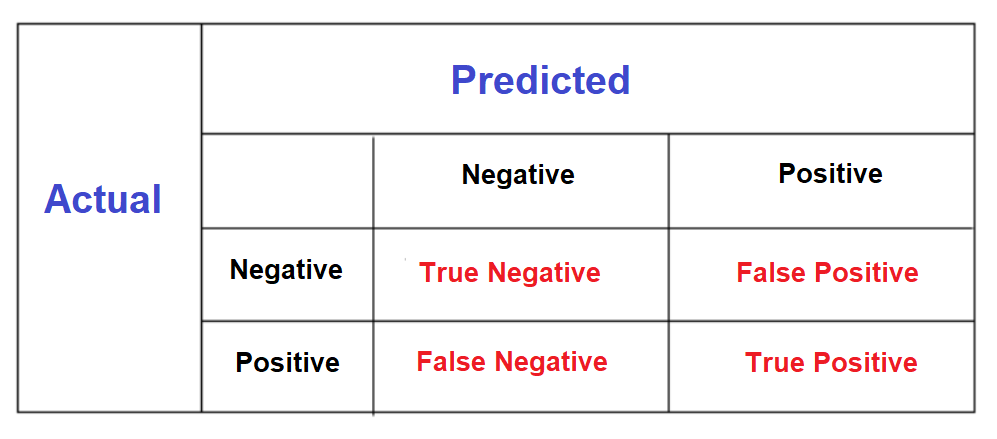

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))

confusion_matrix.index = ['Actual Died','Actual Survived']
confusion_matrix.columns = ['Predicted Died','Predicted Survived']
print(confusion_matrix)

This means 88 + 51 = __139 correct predictions__ & 22 + 18 = __40 false predictions__.

<a id = section6></a>

## 6. Decision Tree with Gridsearch
<br/>
Applying __GridsearchCV__ method for __exhaustive search over specified parameter values__ of estimator.
To know more about the different parameters in decision tree classifier, refer the [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). <br/>
Below we will apply gridsearch over the following parameters:
- criterion 
- max_depth 
- max_features

You can change other parameters also and compare the impact of it via calculating __accuracy score & confusion matrix__

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier(random_state = 0)


tree_para = [{'criterion':['gini','entropy'],'max_depth': range(2,60),
                             'max_features': ['sqrt', 'log2', None] }]
                            
                            

grid_search = GridSearchCV(decision_tree_classifier,tree_para, cv=10, refit='AUC')
grid_search.fit(X_train, y_train)

- Using the model for __prediction__

In [ ]:
y_pred_test1 = grid_search.predict(X_test)

- __Model Evaluation__ using __accuracy_score__

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test1))

- __Model Evaluation__ using __confusion matrix__

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test1))

confusion_matrix.index = ['Actual Died','Actual Survived']
confusion_matrix.columns = ['Predicted Died','Predicted Survived']
print(confusion_matrix)

You can see 95 + 49 = __144 correct predictions__ & 24 + 11 = __35 false predictions__.

__Observations:__

- __With gridsearch__ *accuracy_score* __increased__ from __0.765 to 0.804__ and the __number of correct predictions increased from 139 to 144__ and number of false predictions __decreased__ from __40 to 35__. 